## Presettings

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import xarray as xr
import os
import re
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [3]:
# All directories
root       = "C:/Users/freiste/OneDrive - Ilmatieteen laitos/Documents/IIASA YSSP 2023"
this_dir   =  os.getcwd()

input_dir = f"{root}/02 - Data/AUT"
output_dir = input_dir

## Import Data

In [4]:
Clim = pd.read_csv(f"{input_dir}/almost_all_climatedata.csv")
Clim.drop(columns=['Unnamed: 0'], inplace=True)
Clim= Clim.astype({'season_start': 'datetime64[ns]',
                   'season_end'  : 'datetime64[ns]'})
Clim

ForestryDistrict FederalState  Year  lat_center  lon_center   degreedays  \
0     Eisenstadt+Rust   Burgenland  1988   47.829150   16.678850  3454.059570   
1     Eisenstadt+Rust   Burgenland  1989   47.829150   16.678850  3352.829346   
2     Eisenstadt+Rust   Burgenland  1990   47.829150   16.678850  3309.578369   
3     Eisenstadt+Rust   Burgenland  1991   47.829150   16.678850  3241.460205   
4     Eisenstadt+Rust   Burgenland  1992   47.829150   16.678850  3546.810059   
...               ...          ...   ...         ...         ...          ...   
2935             Wien         Wien  2018   48.208354   16.372504  4067.920410   
2936             Wien         Wien  2019   48.208354   16.372504  3783.009521   
2937             Wien         Wien  2020   48.208354   16.372504  3619.449463   
2938             Wien         Wien  2021   48.208354   16.372504  3536.899658   
2939             Wien         Wien  2022   48.208354   16.372504  3759.310547   

      relevant_degreedays  max_generations season_start season_end  ...  \
0             1760.250122         3.160233   1988-05-06 1988-08-07  ...   
1             1651.180054         2.964417   1989-05-07 1989-08-08  ...   
2             1700.519775         3.052998   1990-05-07 1990-08-08  ...   
3             1646.650024         2.956284   1991-05-07 1991-08-08  ...   
4             1799.090210         3.229964   1992-05-06 1992-08-07  ...   
...                   ...              ...          ...        ...  ...   
2935          2022.809937         3.631616   2018-05-06 2018-08-08  ...   
2936          1925.109863         3.456212   2019-05-06 2019-08-08  ...   
2937          1775.670166         3.187918   2020-05-05 2020-08-07  ...   
2938          1884.549927         3.383393   2021-05-06 2021-08-08  ...   
2939          1997.280029         3.585781   2022-05-06 2022-08-08  ...   

      Windspavg_5  Windspavg_6  Windspavg_7  Windspavg_8  Humavg_JJA  \
0        2.714000     2.815161     2.710333     2.889355   58.461648   
1        4.035333     3.070968     2.726333     2.362258   66.873007   
2        3.332666     2.374193     2.482333     2.685484   60.960215   
3        3.248333     4.737096     3.411999     3.276774   65.655444   
4        4.045667     3.004839     2.935667     3.388387   61.459356   
...           ...          ...          ...          ...         ...   
2935     3.306667     2.672903     3.073334     2.845484   60.620725   
2936     3.574666     3.583548     2.926334     2.902258   61.259747   
2937     2.318667     3.061935     3.496000     2.692581   62.455594   
2938     3.584334     3.934193     2.796666     3.169355   57.924838   
2939     3.072666     2.174516     2.587000     2.728065   64.596166   

      Precipavg_JJA   Tavg_JJA  Tmaxavg_JJA  Tminavg_JJA  Windspavg_JJA  
0          1.310968  18.493773    24.467051    12.539398       2.804950  
1          2.265341  17.173635    22.522856    11.934115       2.719853  
2          1.428065  17.652146    23.601348    11.728927       2.514003  
3          3.905699  16.788432    21.979372    11.557678       3.808623  
4          1.530072  18.438225    24.163195    12.769395       3.109631  
...             ...        ...          ...          ...            ...  
2935       2.357061  20.729293    26.267427    15.140590       2.863907  
2936       2.171792  19.686796    25.105243    14.207316       3.137380  
2937       2.667742  18.309544    23.876347    12.681067       3.083505  
2938       2.116165  19.492581    25.301587    13.617634       3.300071  
2939       1.844301  20.461359    26.797986    14.129416       2.496527  

[2940 rows x 43 columns]

In [5]:
FI = pd.read_csv(f'{input_dir}/Data_BWF_ForestInventory_Postprocessed.csv')
FI.drop(columns=['Period', 'PeriodLength', 'Unnamed: 0',
                 'ErtragswaldShare','ErtragswaldArea', 'ErtragswaldStock', 'ErtragswaldTotalStock',
                 'ConiferousShare2','SpruceEWShare','SpruceArea-SD','DeadSpruceDensity', 'DWSt-SD'], 
        inplace=True)
FI

ForestryDistrict      FederalState  Year     Area  \
0     Eisenstadt+Rust        Burgenland  1996   516.03   
1     Eisenstadt+Rust        Burgenland  1997   516.03   
2     Eisenstadt+Rust        Burgenland  1998   516.03   
3     Eisenstadt+Rust        Burgenland  1999   516.03   
4     Eisenstadt+Rust        Burgenland  2000   516.03   
...               ...               ...   ...      ...   
2153       Vorarlberg  Vorarlberg_total  2017  2601.67   
2154       Vorarlberg  Vorarlberg_total  2018  2601.67   
2155       Vorarlberg  Vorarlberg_total  2019  2601.67   
2156       Vorarlberg  Vorarlberg_total  2020  2601.67   
2157       Vorarlberg  Vorarlberg_total  2021  2601.67   

      DistrictShareAustrForest  DistrictShareStateForest  TotalForestShare  \
0                     0.004017                  0.122137          0.310059   
1                     0.004033                  0.122145          0.310867   
2                     0.004050                  0.122152          0.311674   
3                     0.004066                  0.122159          0.312482   
4                     0.004082                  0.122166          0.313289   
...                        ...                       ...               ...   
2153                  0.024404                  1.000000          0.373612   
2154                  0.024411                  1.000000          0.373709   
2155                  0.024417                  1.000000          0.373806   
2156                  0.024423                  1.000000          0.373903   
2157                  0.024430                  1.000000          0.374000   

      TotalForestArea  ConiferousShare  ConiferousArea  ...  \
0        16000.000000         0.390625     6250.000000  ...   
1        16041.666667         0.325521     6153.846154  ...   
2        16083.333333         0.260417     6057.692308  ...   
3        16125.000000         0.195312     5961.538462  ...   
4        16166.666667         0.130208     5865.384615  ...   
...               ...              ...             ...  ...   
2153     97201.638667         0.513354    37000.000000  ...   
2154     97226.843500         0.527265    36750.000000  ...   
2155     97252.048333         0.541177    36500.000000  ...   
2156     97277.253167         0.555088    36250.000000  ...   
2157     97302.458000         0.569000    36000.000000  ...   

      SpruceShareTotalForest  SpruceConifShare    SpruceArea  SpruceArea2  \
0                   0.093750          0.240000   1500.000000     0.000000   
1                   0.093510          0.244615   1500.000000   146.520147   
2                   0.093269          0.249231   1500.000000   293.040293   
3                   0.093029          0.253846   1500.000000   439.560440   
4                   0.092788          0.258462   1500.000000   586.080586   
...                      ...               ...           ...          ...   
2153                0.305222          0.794872  29666.666667  9285.115207   
2154                0.303427          0.794872  29500.000000  6963.836406   
2155                0.301631          0.794872  29333.333333  4642.557604   
2156                0.299835          0.794872  29166.666667  2321.278802   
2157                0.298040          0.794872  29000.000000     0.000000   

      SpruceStockShare  SpruceStock  DWStShare  DWStStock  DeadSpruceStShare  \
0             0.213627     400000.0      0.028   6.800000            0.00280   
1             0.213627     400000.0      0.028   6.800000            0.00280   
2             0.213627     400000.0      0.028   6.800000            0.00280   
3             0.213627     400000.0      0.028   6.800000            0.00280   
4             0.213627     400000.0      0.028   6.800000            0.00280   
...                ...          ...        ...        ...                ...   
2153          0.725265   15499000.0      0.025  10.633333            0.01595   
2154          0.725265   15499000.0      0.025  1

In [6]:
FI_TFA = FI[indexes+['TotalForestArea']]
FI_TFA[FI_TFA.FederalState == 'Burgenland_total']

NameError: name 'indexes' is not defined

In [7]:
# Documentation of Forest damage factors (BWF)   (DWF)

DFDF = pd.read_excel(f'{input_dir}/Data_BWF_DocumentationOfForestdamagefactors.xlsx', 
                     usecols=list(range(11)))

DFDF.drop(index=0, columns=['PeriodLength', 'IpsTypographusShare', 'BBDamageYrly', 'Area'], inplace=True)  # drop source and unit lines

DFDF

ForestryDistrict      FederalState  Year YrlyStormDamage IpsTypDamageYrly  \
1         Burgenland  Burgenland_total  1989             NaN        6794.7021   
2         Burgenland  Burgenland_total  1990             NaN        6794.7021   
3         Burgenland  Burgenland_total  1991             NaN        6794.7021   
4         Burgenland  Burgenland_total  1992             NaN       33973.5105   
5         Burgenland  Burgenland_total  1993             NaN      47562.91356   
..               ...               ...   ...             ...              ...   
276            Tirol       Tyrol_total  2020             NaN            87480   
277            Tirol       Tyrol_total  2021             NaN           221088   
278            Tirol       Tyrol_total  2022             NaN          1505280   
279            Lienz             Tirol  2021             NaN         111333.6   
280            Lienz             Tirol  2022             NaN          1267728   

    IpsTypAreaDamage IpsTypAreaDamage2  
1                NaN               NaN  
2                NaN               NaN  
3                NaN               NaN  
4                NaN               NaN  
5                NaN               NaN  
..               ...               ...  
276              NaN               293  
277              NaN               614  
278              NaN               NaN  
279              NaN               NaN  
280              NaN               NaN  

[280 rows x 7 columns]

In [8]:
# Annual Logging Reports (Ministry of Transport & Co.)   (HEM)

ALR = pd.read_excel(f'{input_dir}/Data_BMLRT_AnnualLoggingReports.xlsx')

ALR = ALR.sort_values(by=['FederalState', 'ForestryDistrict', 'Year'])
#alr_order = 'ForestryDistrict 	FederalState 	Year 	beetle_salvage_1 	storm_salvage_1'.split(' 	')
#ALR = ALR[alr_order]

ALR.drop(index=0, inplace=True)

In [9]:
# still need to add previous-year parameters

#### Merge Predictors together together

In [10]:
indexes = ['ForestryDistrict', 'FederalState', 'Year']

In [71]:
Merge = Clim.merge(
        FI, 
        on=indexes, 
        how='outer', 
        suffixes=(False, False)
    ).merge(
        ALR, 
        on=indexes, 
        how='outer', 
        suffixes=(False, False)
    ).merge(
        DFDF, 
        on=indexes, 
        how='outer', 
        suffixes=(False, False)
    )


Merge['bb_damage_mean'] = Merge['beetle_salvage_2	IpsTypDamageYrly'.split('	')].mean(axis=1)
Merge['season_start']   = Merge["season_start"].dt.dayofyear
Merge['season_end']     = Merge["season_end"].dt.dayofyear



Merge.drop(columns=['storm_salvage_2', 'storm_salvage_3',
                    'beetle_salvage_1', 'beetle_salvage_2', 'beetle_salvage_3','IpsTypDamageYrly',
                    'overkilldays', 'DeadSpruceArea', 'DeadSpruceStShare'], inplace=True)


order = ['ForestryDistrict', 'FederalState', 'lat_center', 'lon_center', 'Year', 'degreedays', 'relevant_degreedays', 'max_generations', 'season_start',
       'season_end', 'season_length', 'frostdays', 
       'Humavg_5','Humavg_6', 'Humavg_7', 'Humavg_8', 'Humavg_JJA',
       'Precipavg_5', 'Precipavg_6','Precipavg_7', 'Precipavg_8', 'Precipavg_JJA', 
       'Tavg_5', 'Tavg_6', 'Tavg_7', 'Tavg_8', 'Tavg_JJA',
       'Tmaxavg_5', 'Tmaxavg_6', 'Tmaxavg_7', 'Tmaxavg_8', 'Tmaxavg_JJA', 
       'Tminavg_5','Tminavg_6', 'Tminavg_7', 'Tminavg_8', 'Tminavg_JJA', 
       'Windspavg_5', 'Windspavg_6','Windspavg_7', 'Windspavg_8', 'Windspavg_JJA', 
       'Area',
       'DistrictShareAustrForest', 'DistrictShareStateForest',
       'TotalForestShare', 'TotalForestArea', 'ConiferousShare',
       'ConiferousArea', 'ConiferousStock', 'SpruceShareTotalArea',
       'SpruceShareTotalForest', 'SpruceConifShare', 'SpruceArea',
       'SpruceArea2', 'SpruceStockShare', 'SpruceStock', 
       'DWStShare', 'DWStStock', 
       'storm_salvage_1',
       'bb_damage_mean']


Merge = Merge[order]

In [72]:
# X and Y must be same length for scikit-learn

# I must get rid of all the NaN values!     df.fillna(df.mean(), inplace=True)

Merge = Merge[~Merge.bb_damage_mean.isna()]

Merge[Merge.isna().any(axis=1)]

Merge = Merge.reset_index(drop=True)

Merge.ForestryDistrict = Merge.ForestryDistrict.str.replace("+","")
Merge.ForestryDistrict = Merge.ForestryDistrict.str.replace("-","")
Merge.ForestryDistrict = Merge.ForestryDistrict.str.replace("/","")

Merge.FederalState = Merge.FederalState.str.replace("Kärnten","Carinthia")
Merge.FederalState = Merge.FederalState.str.replace("Wien","Vienna")
Merge.FederalState = Merge.FederalState.str.replace("Tirol","Tyrol")
Merge.FederalState = Merge.FederalState.str.replace("Niederösterreich","LowerAustria")
Merge.FederalState = Merge.FederalState.str.replace("Oberösterreich","UpperAustria")
Merge.FederalState = Merge.FederalState.str.replace("Steiermark","Styria")

Merge = Merge[Merge.FederalState != 'Vienna']

Merge.Area = Merge.Area*100  # Convert total district area from km2 to ha


## Getting rid of NaNs

In [73]:
check_for_nan = [
    'TotalForestShare', 
    'TotalForestArea', 
    'ConiferousShare',
    'ConiferousArea', 
    'ConiferousStock', 
    'SpruceShareTotalArea',
    'SpruceShareTotalForest', 
    'SpruceConifShare', 
    'SpruceArea',
    'SpruceArea2',
    'SpruceStockShare', 
    'SpruceStock', 
    'DWStShare',
    'DWStStock', 
    'storm_salvage_1',
    'YrlyStormDamage'
]


In [15]:
states = ['Kärnten', 'Vorarlberg', 'Steiermark', 'Salzburg', 'Burgenland', 'Niederösterreich', 'Oberösterreich', 'Tirol']

In [16]:
Merge.columns

Index(['ForestryDistrict', 'FederalState', 'lat_center', 'lon_center', 'Year',
       'degreedays', 'relevant_degreedays', 'max_generations', 'season_start',
       'season_end', 'season_length', 'frostdays', 'Humavg_5', 'Humavg_6',
       'Humavg_7', 'Humavg_8', 'Humavg_JJA', 'Precipavg_5', 'Precipavg_6',
       'Precipavg_7', 'Precipavg_8', 'Precipavg_JJA', 'Tavg_5', 'Tavg_6',
       'Tavg_7', 'Tavg_8', 'Tavg_JJA', 'Tmaxavg_5', 'Tmaxavg_6', 'Tmaxavg_7',
       'Tmaxavg_8', 'Tmaxavg_JJA', 'Tminavg_5', 'Tminavg_6', 'Tminavg_7',
       'Tminavg_8', 'Tminavg_JJA', 'Windspavg_5', 'Windspavg_6', 'Windspavg_7',
       'Windspavg_8', 'Windspavg_JJA', 'Area', 'DistrictShareAustrForest',
       'DistrictShareStateForest', 'TotalForestShare', 'TotalForestArea',
       'ConiferousShare', 'ConiferousArea', 'ConiferousStock',
       'SpruceShareTotalArea', 'SpruceShareTotalForest', 'SpruceConifShare',
       'SpruceArea', 'SpruceArea2', 'SpruceStockShare', 'SpruceStock',
       'DWStShare', 'DWStS

In [143]:
# Established Nan-riddance
Merge.Area = Merge.groupby('ForestryDistrict').Area.bfill().ffill().reset_index(drop=True)

Merge.TotalForestArea = Merge.groupby('ForestryDistrict').TotalForestArea.bfill().ffill().reset_index(drop=True)
Merge.TotalForestShare = Merge.TotalForestArea / Merge.Area
Merge.DistrictShareAustrForest = Merge.groupby('ForestryDistrict').DistrictShareAustrForest.bfill().ffill().reset_index(drop=True)
Merge.DistrictShareStateForest = Merge.groupby('ForestryDistrict').DistrictShareStateForest.bfill().ffill().reset_index(drop=True)

Merge.ConiferousArea = Merge.groupby('ForestryDistrict').ConiferousArea.bfill().ffill().reset_index(drop=True)
Merge.ConiferousShare = Merge.ConiferousArea / Merge.TotalForestArea
Merge.ConiferousStock = Merge.groupby('ConiferousStock').Area.bfill().ffill().reset_index(drop=True)


Merge.SpruceArea = Merge.groupby('ForestryDistrict').SpruceArea.bfill().ffill().reset_index(drop=True)
Merge.SpruceArea2 = Merge.groupby('ForestryDistrict').SpruceArea2.bfill().ffill().reset_index(drop=True)
Merge.SpruceShareTotalArea = Merge.groupby('ForestryDistrict').SpruceShareTotalArea.bfill().ffill().reset_index(drop=True)
Merge.SpruceShareTotalForest = Merge.groupby('ForestryDistrict').SpruceShareTotalForest.bfill().ffill().reset_index(drop=True)
Merge.SpruceConifShare = Merge.groupby('ForestryDistrict').SpruceConifShare.bfill().ffill().reset_index(drop=True)

Merge.SpruceStockShare = Merge.groupby('ForestryDistrict').SpruceStockShare.bfill().ffill().reset_index(drop=True)
Merge.SpruceStock = Merge.groupby('ForestryDistrict').SpruceStock.bfill().ffill().reset_index(drop=True)

Merge.DWStShare = Merge.groupby('ForestryDistrict').DWStShare.bfill().ffill().reset_index(drop=True)
Merge.DWStStock = Merge.groupby('ForestryDistrict').DWStStock.bfill().ffill().reset_index(drop=True)


Merge.storm_salvage_1 = Merge.storm_salvage_1.fillna(0)

In [160]:
# Check where the NaNs are
i = 60

var = Merge.columns[i]   #check_for_nan[i]
print(var)

sub = Merge[Merge[var].isnull()][indexes+[var]]
sub

bb_damage_mean


Empty DataFrame
Columns: [ForestryDistrict, FederalState, Year, bb_damage_mean]
Index: []

In [172]:
Merge.to_csv(f'{output_dir}/Data_merged_cleared.csv')

In [392]:
sns.lineplot(x=Merge.Year, y=Merge.DistrictShareStateForest, hue=Merge.ForestryDistrict, legend=False)

In [18]:
# % of state forest in district

left  = Merge[~Merge.ForestryDistrict.isin(states)][indexes+['TotalForestArea']]
right = Merge[Merge.ForestryDistrict.isin(states)][indexes+['TotalForestArea']].groupby(['FederalState', 'Year']).sum().reset_index().rename(columns={'FederalState' : 'FD', 'ForestryDistrict' : 'FederalState'})
right.drop(columns='FD', inplace=True)

lr = left.merge(right, on=['FederalState', 'Year'], suffixes=("_distr","_state"))
lr = lr.sort_values(by=['FederalState', 'ForestryDistrict', 'Year']).reset_index(drop=True)
lr['DistrictShareStateForest'] = lr.TotalForestArea_distr / lr.TotalForestArea_state
del left, right

lr = lr.sort_values(by=['FederalState', 'ForestryDistrict', 'Year']).reset_index(drop=True).drop(columns=['TotalForestArea_distr', 'TotalForestArea_state'])
Merge = Merge.merge(lr, how='outer', on=['FederalState', 'Year']).drop(columns='ForestryDistrict_y')

Merge = Merge.drop(columns='DistrictShareStateForest_x')
Merge = Merge.rename(columns={'DistrictShareStateForest_y' : 'DistrictShareStateForest',
                              'ForestryDistrict_x' : 'ForestryDistrict'})

Merge = Merge[order]
Merge.DistrictShareStateForest = Merge.DistrictShareStateForest.fillna(1)


In [ ]:
# Still have to track district-level data back to 1989!

##### Comparison Performance Parameters

In [78]:
count = {}
P = {}

# Plotting
## Aggregated Data

#### 1) With Mean
Mean over all locations for each year for all parameters, it also includes state-level values.

Number of Parameters R2>0.2 :  15


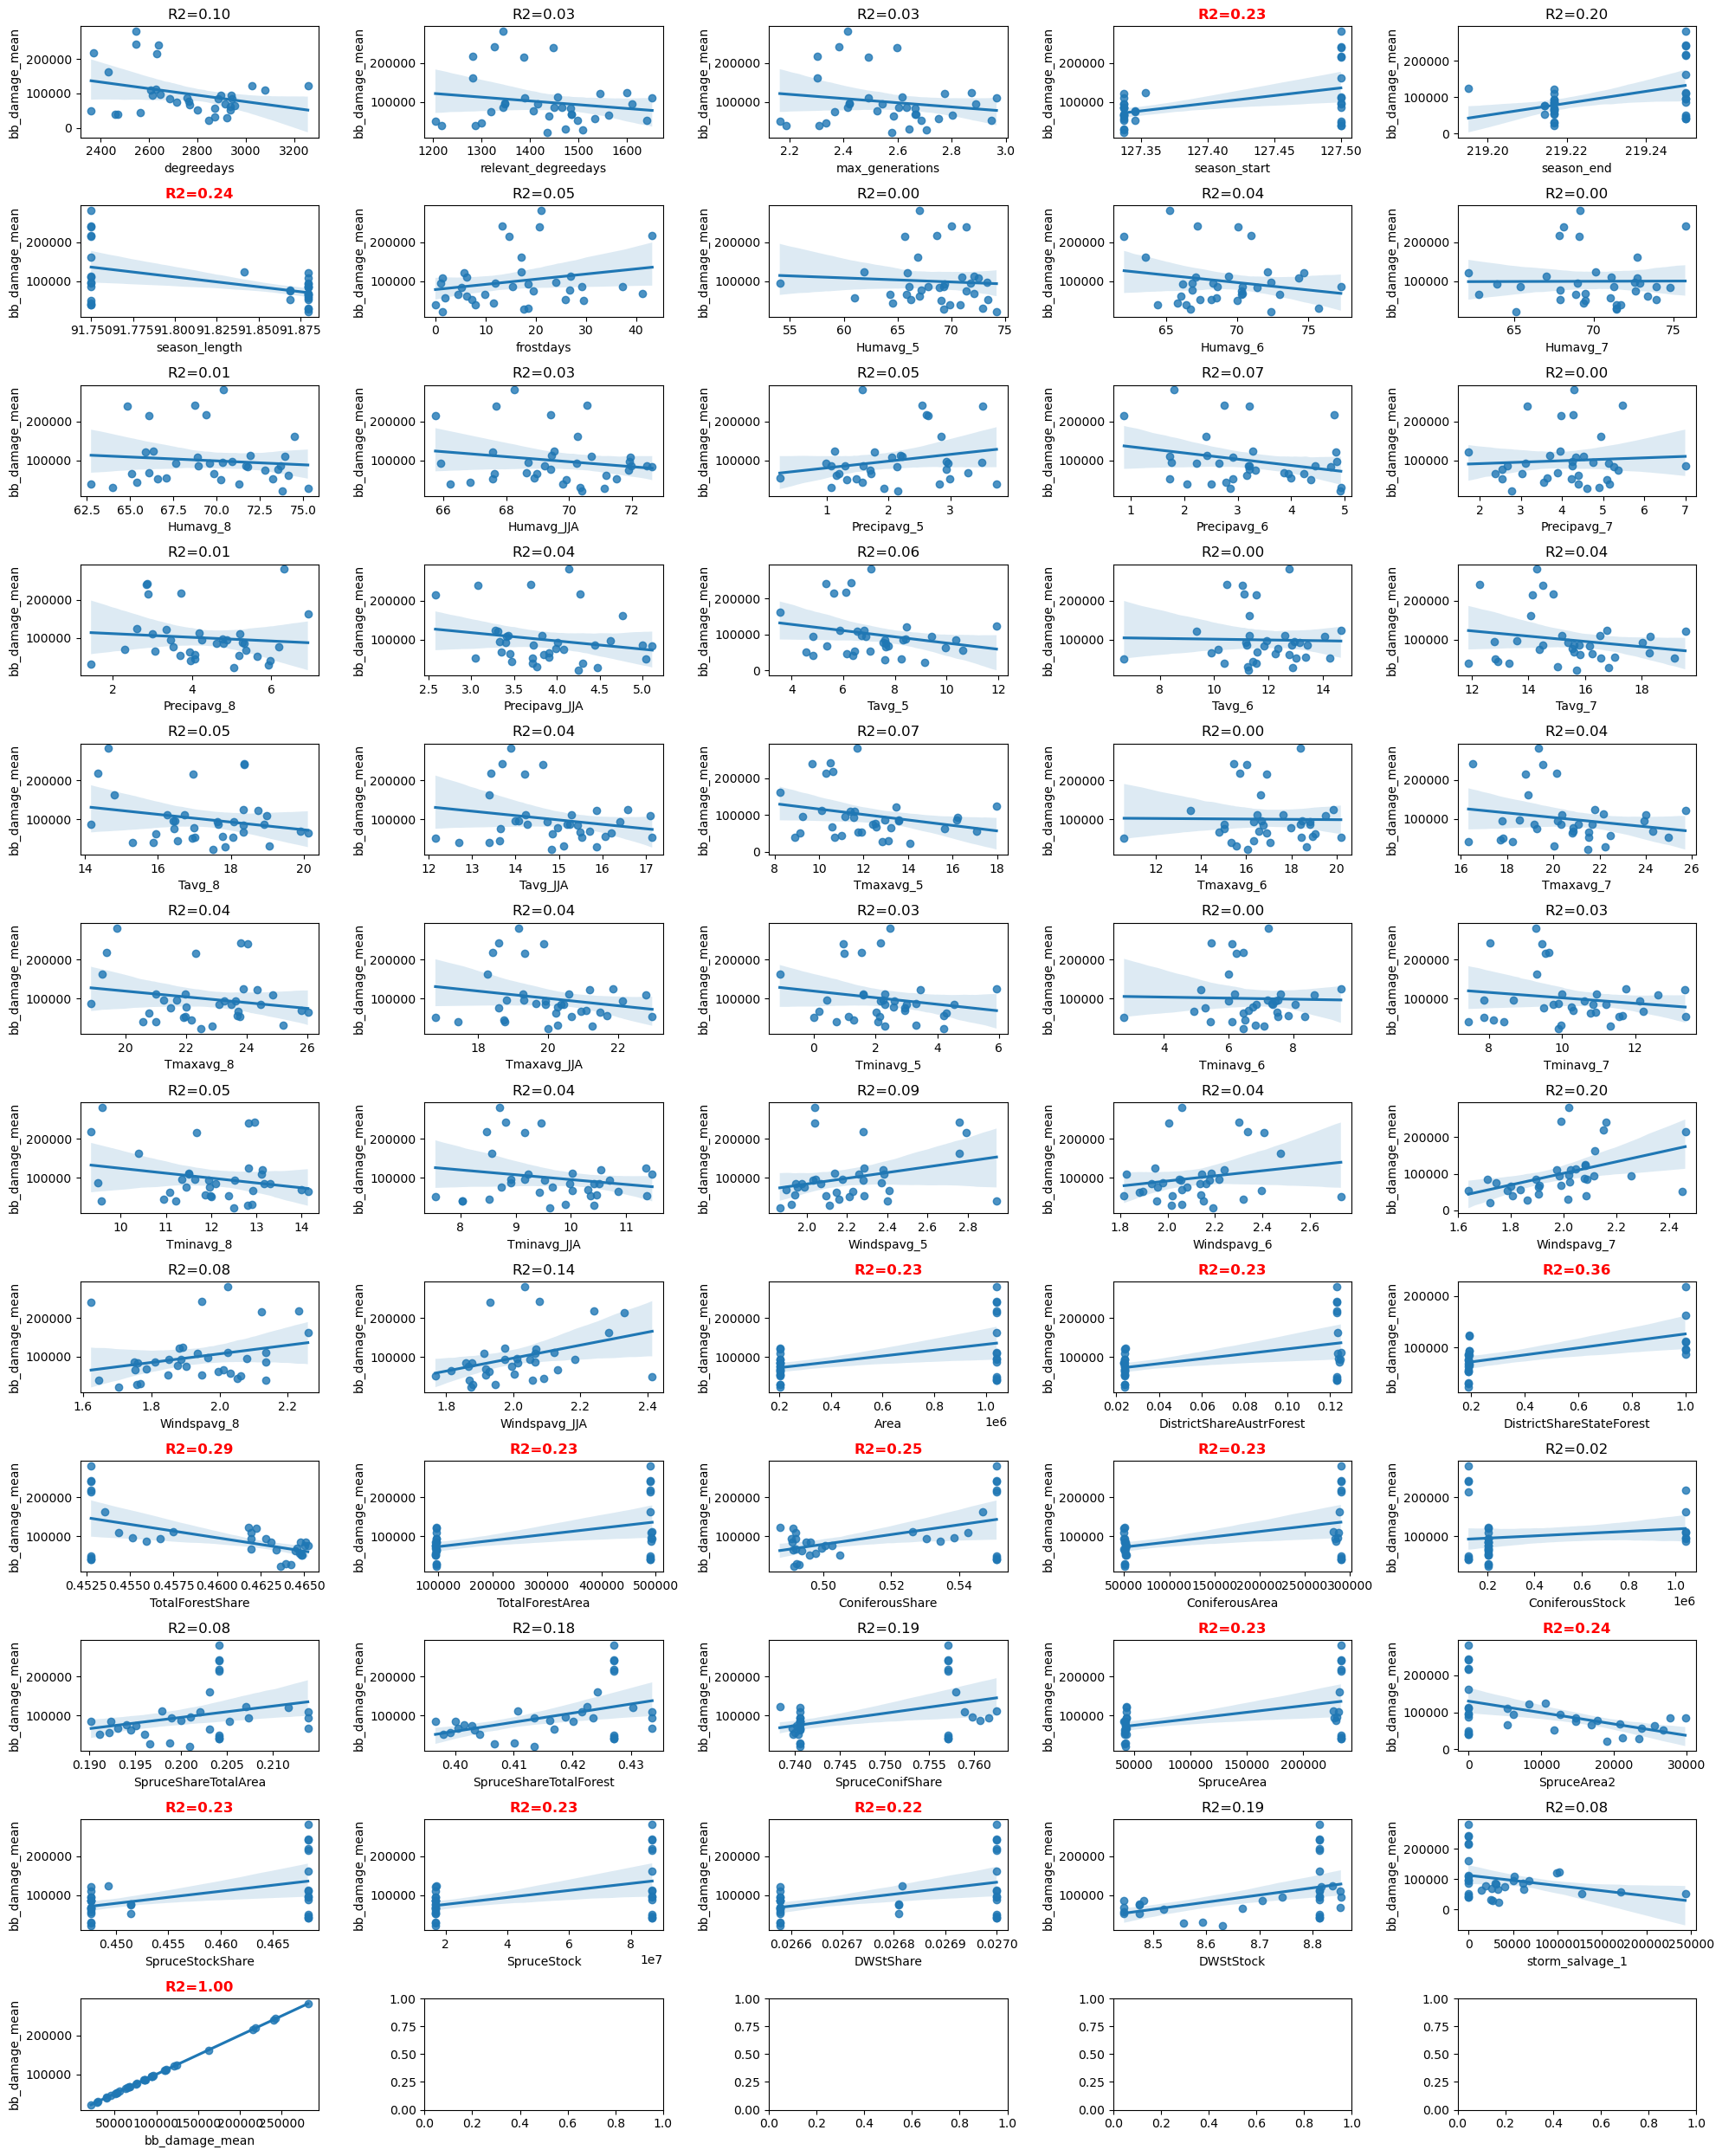

In [80]:
dat = Merge[Merge.columns[4:]].groupby('Year').mean()

fig, axs = plt.subplots(12,5, dpi=100, figsize=(20,25))

count[1]=0

for i, ax in enumerate(fig.axes):
    
    if i<56:   
        var = dat.columns[i]
        
        x = dat[var].astype(np.float64)
        y = dat['bb_damage_mean'].astype(np.float64)
        
        sns.regplot(x = x, 
                    y = y, 
                    ax=ax)
        
        # Pearson R
        try:
            mask = ~np.isnan(x) & ~np.isnan(y)
            
            model = LinearRegression().fit(x.values[mask].reshape((-1, 1)), y.values[mask])
            r_sq  = model.score(x.values[mask].reshape((-1, 1)), y.values[mask])
            
            if r_sq >= 0.2:
                weight='bold'
                color='red'
                count[1]+=1
            else:
                weight='normal'
                color='black'
                
            ax.set_title(f"R2={r_sq :.2f}", weight=weight, color=color)
            
        except: 
            print(f"{var} contains NaN")
        
    else:
        pass 
print(f"Number of Parameters R2>0.2 :  {count[1]}")   
fig.tight_layout()
    


#### 2) With Sum
Sum over all locations for each year for all parameters, it also includes state-level values.

Number of Parameters R2>0.2 :  56


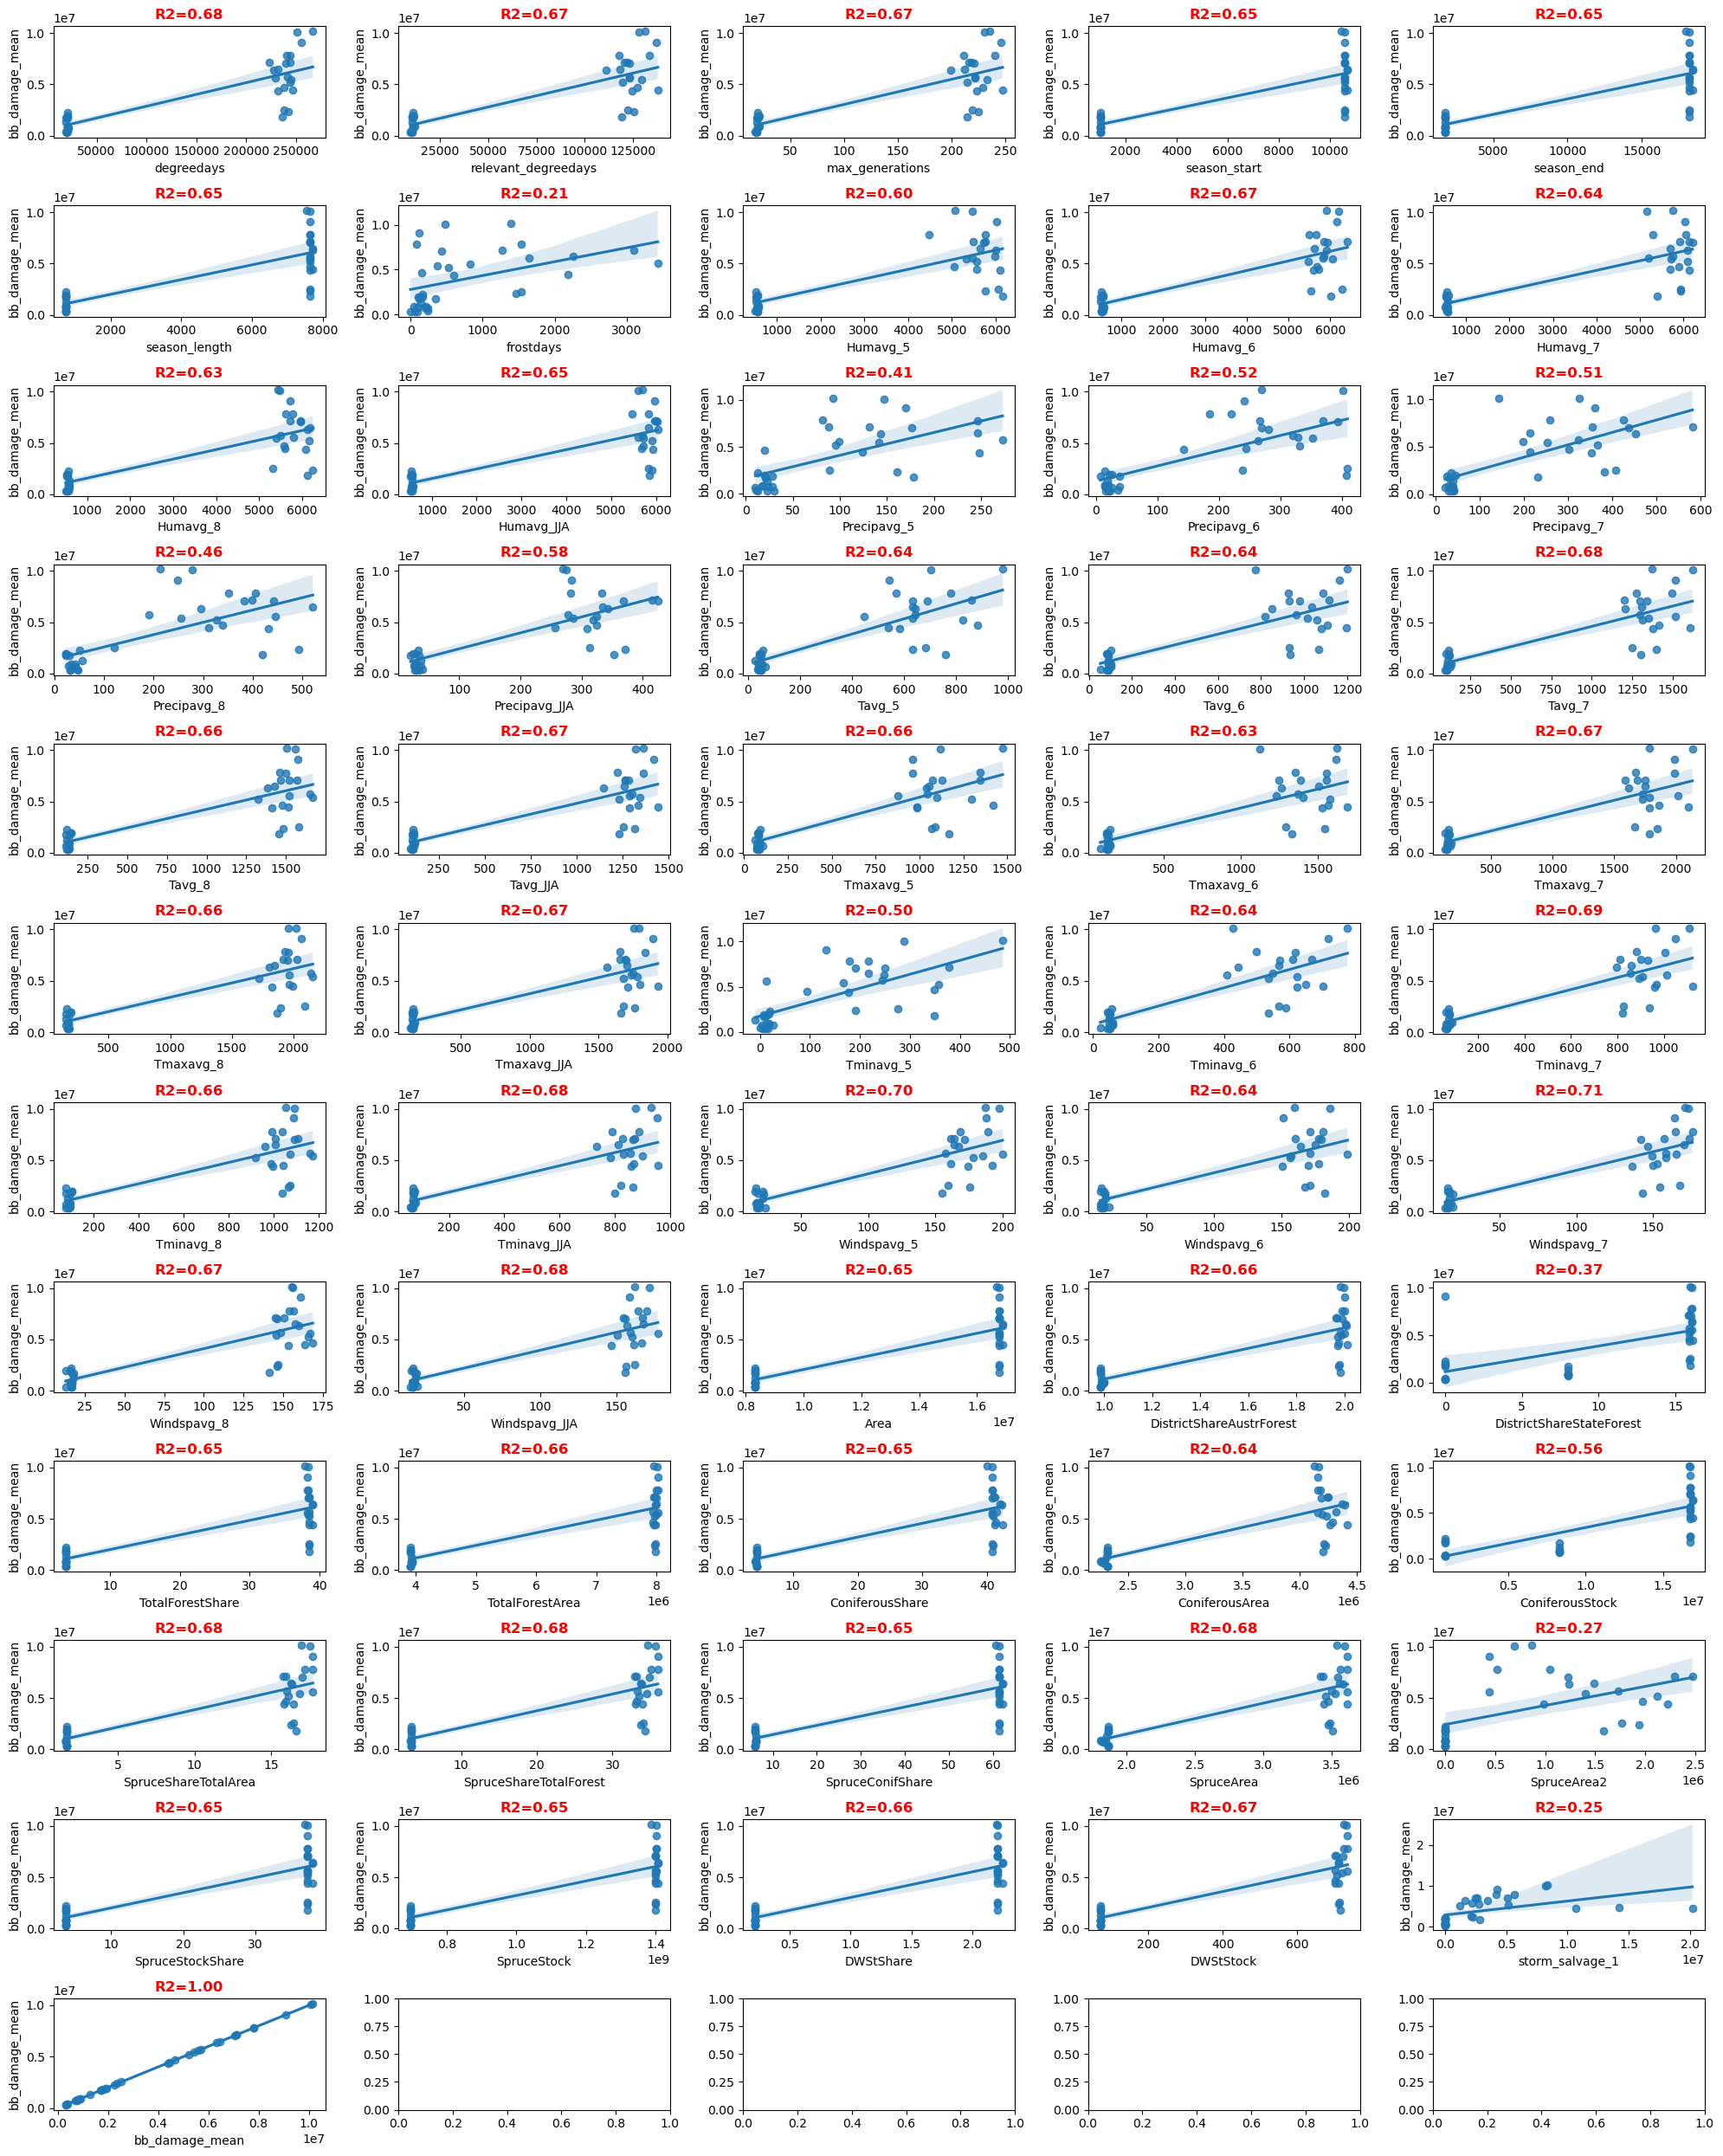

In [91]:
dat = Merge[Merge.columns[4:]].groupby('Year').sum()

fig, axs = plt.subplots(12,5, dpi=100, figsize=(20,25))
count[2]=0
for i, ax in enumerate(fig.axes):
    
    if i<56:   
        var = dat.columns[i]
        
        x = dat[var].astype(np.float64)
        y = dat['bb_damage_mean'].astype(np.float64)
        
        sns.regplot(x = x, 
                    y = y, 
                    ax=ax)
        
        # Pearson R
        try:
            mask = ~np.isnan(x) & ~np.isnan(y)
            
            model = LinearRegression().fit(x.values[mask].reshape((-1, 1)), y.values[mask])
            r_sq  = model.score(x.values[mask].reshape((-1, 1)), y.values[mask])
            
            if r_sq >= 0.2:
                weight='bold'
                color='red'
                count[2]+= 1
            else:
                weight='normal'
                color='black'
                
            ax.set_title(f"R2={r_sq :.2f}", weight=weight, color=color)
            
        except: 
            print(f"{var} contains NaN")
        
    else:
        pass 
print(f"Number of Parameters R2>0.2 :  {count[2]}")
fig.tight_layout()
    


#### District Level only (no state-level)

In [88]:
data_district_level_only = \
Merge[~Merge.FederalState.isin(['Burgenland_total', 'Carinthia_total', 'LowerAustria_total', 'Salzburg_total',
                                   'Styria_total', 'Tyrol_total', 'UpperAustria_total', 'Vorarlberg_total', 'Wien'])]

#### 3) With Mean
Mean over all locations for each year for all parameters, does not include state-level values.

Number of Parameters R2>0.2 :  13


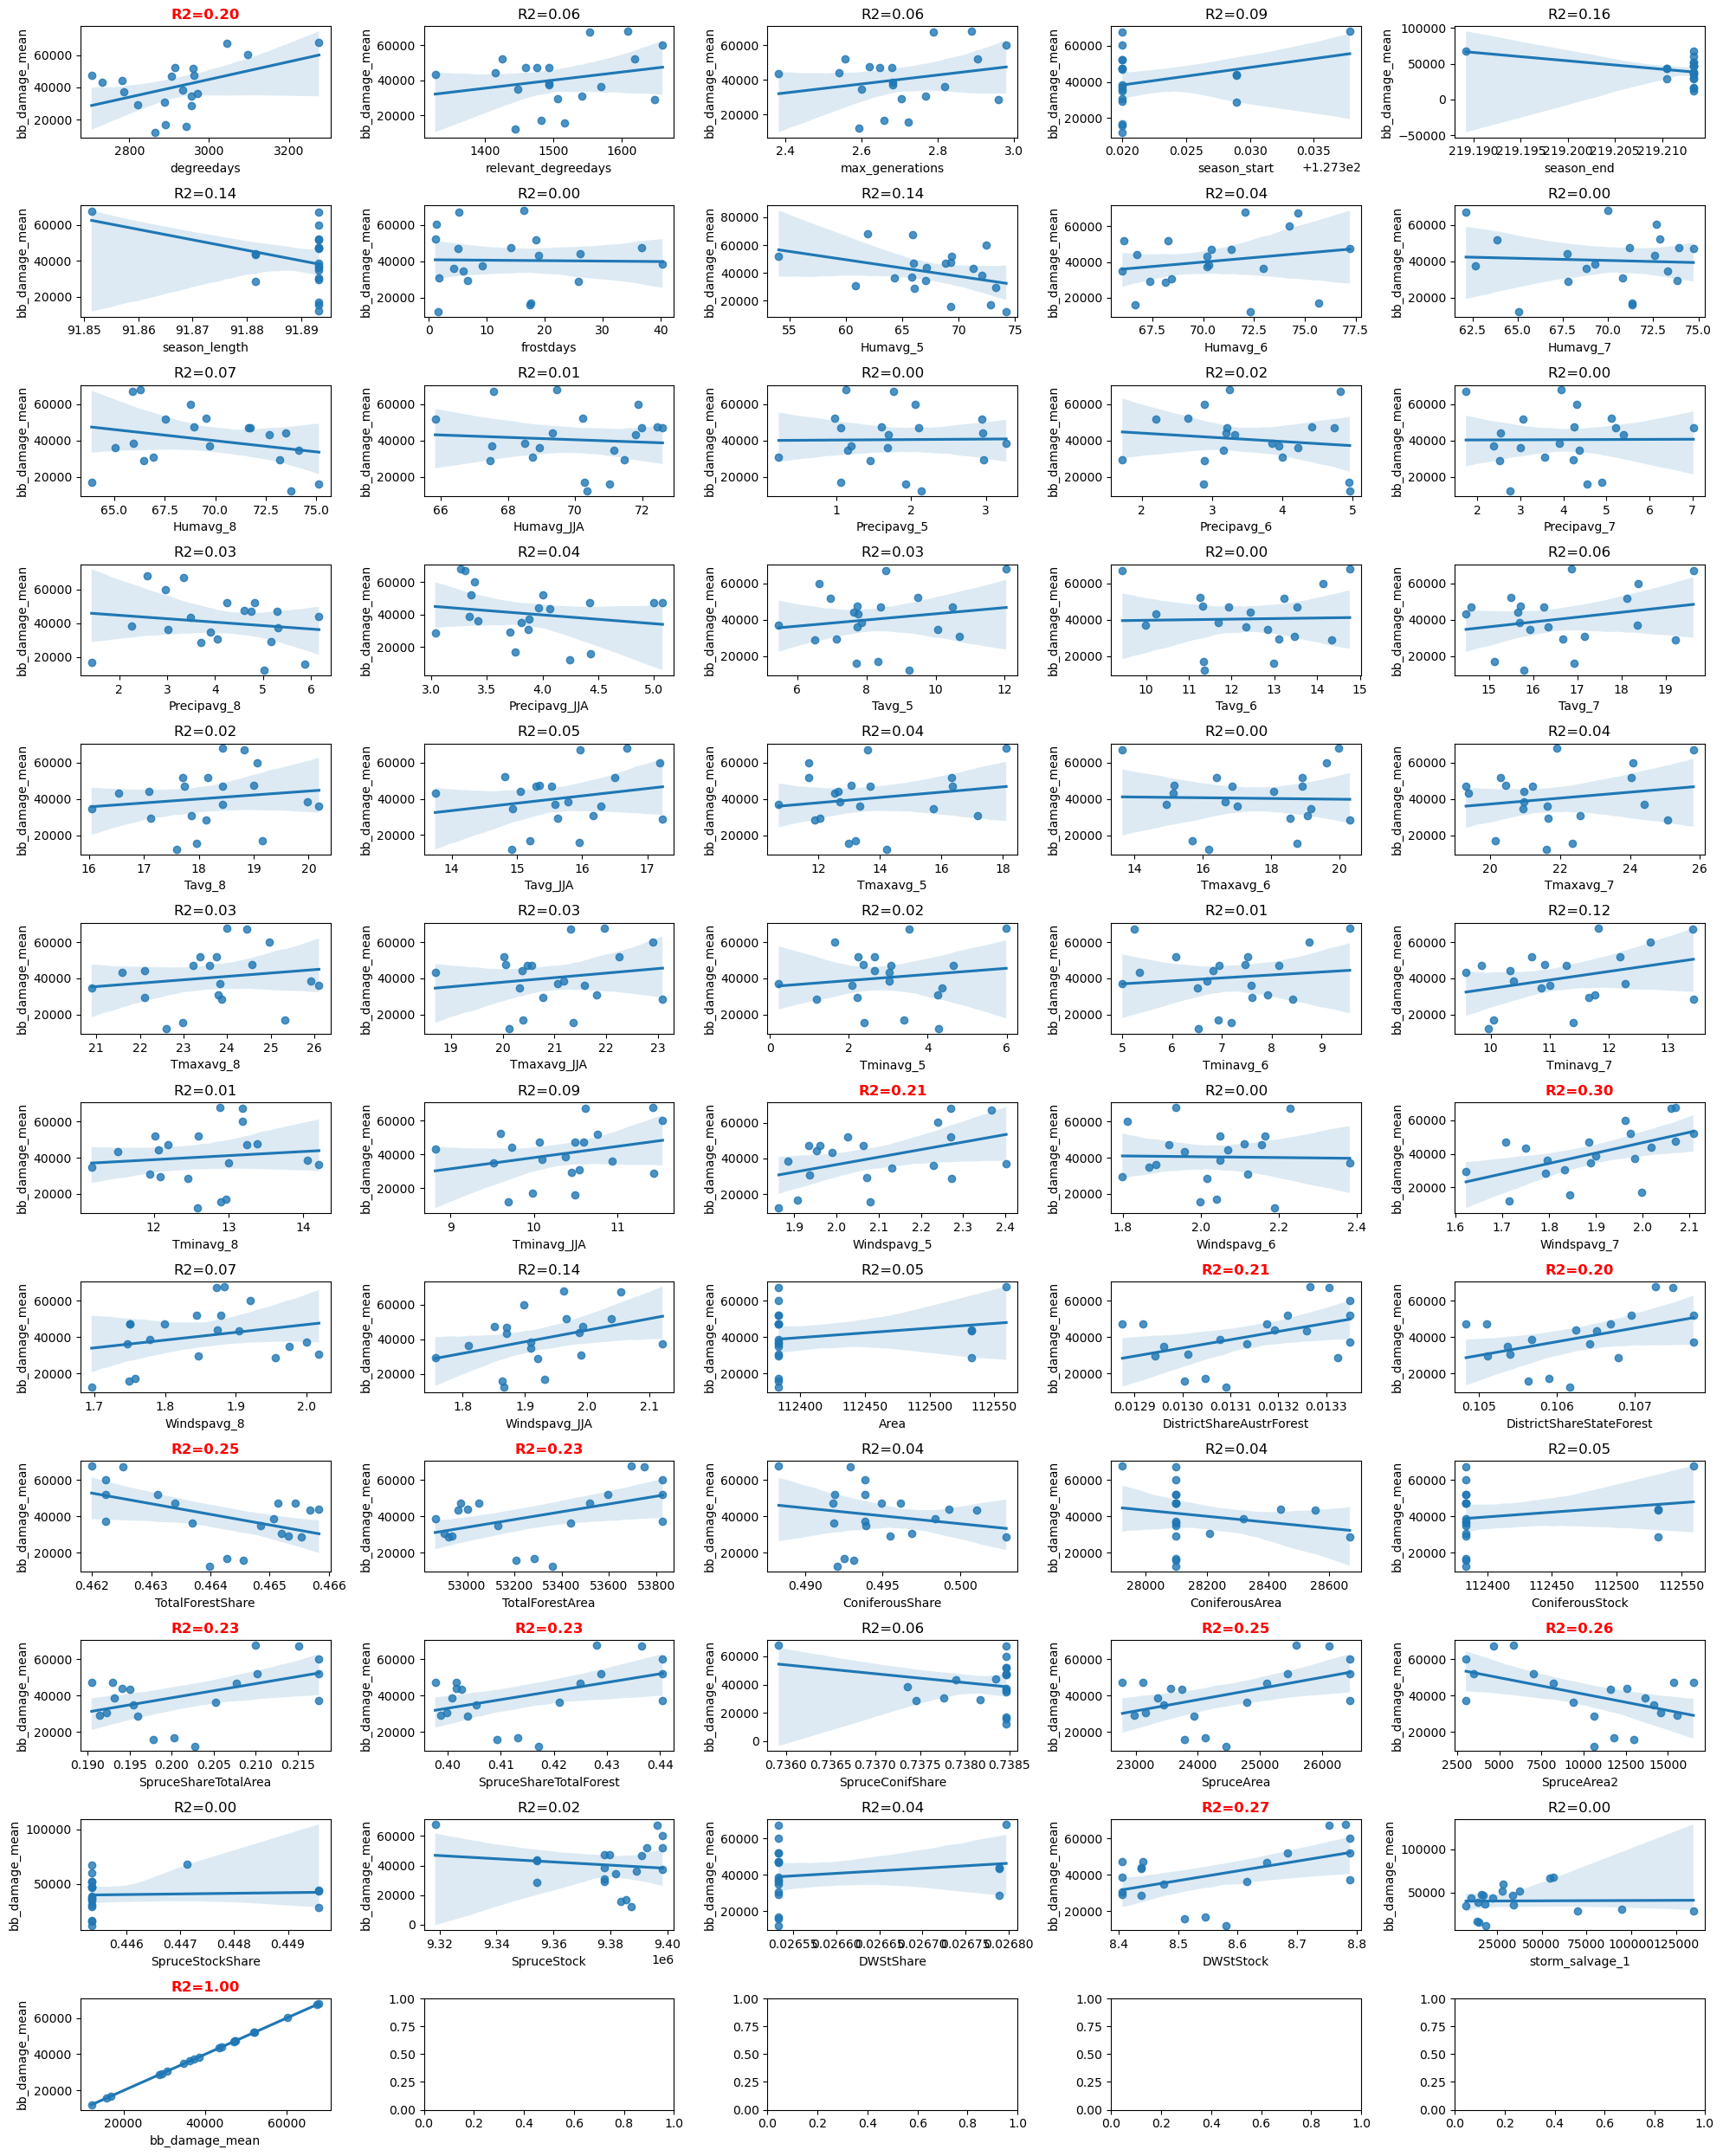

In [90]:
dat = data_district_level_only[data_district_level_only.columns[4:]].groupby('Year').mean()

fig, axs = plt.subplots(12,5, dpi=100, figsize=(20,25))
count[3]=0

for i, ax in enumerate(fig.axes):
    
    if i<56:   
        var = dat.columns[i]
        
        x = dat[var].astype(np.float64)
        y = dat['bb_damage_mean'].astype(np.float64)
        
        sns.regplot(x = x, 
                    y = y, 
                    ax=ax)
        
        # Pearson R
        try:
            mask = ~np.isnan(x) & ~np.isnan(y)
            
            model = LinearRegression().fit(x.values[mask].reshape((-1, 1)), y.values[mask])
            r_sq  = model.score(x.values[mask].reshape((-1, 1)), y.values[mask])
            
            if r_sq >= 0.2:
                weight='bold'
                color='red'
                count[3]+=1
            else:
                weight='normal'
                color='black'
                
            ax.set_title(f"R2={r_sq :.2f}", weight=weight, color=color)
            
        except: 
            print(f"{var} contains NaN")
        
    else:
        pass 
print(f"Number of Parameters R2>0.2 :  {count[3]}")     
fig.tight_layout()
    


#### 4) With Sum
Sum over all locations for each year for all parameters, does not include state-level values.

Number of Parameters R2>0.2 :  3


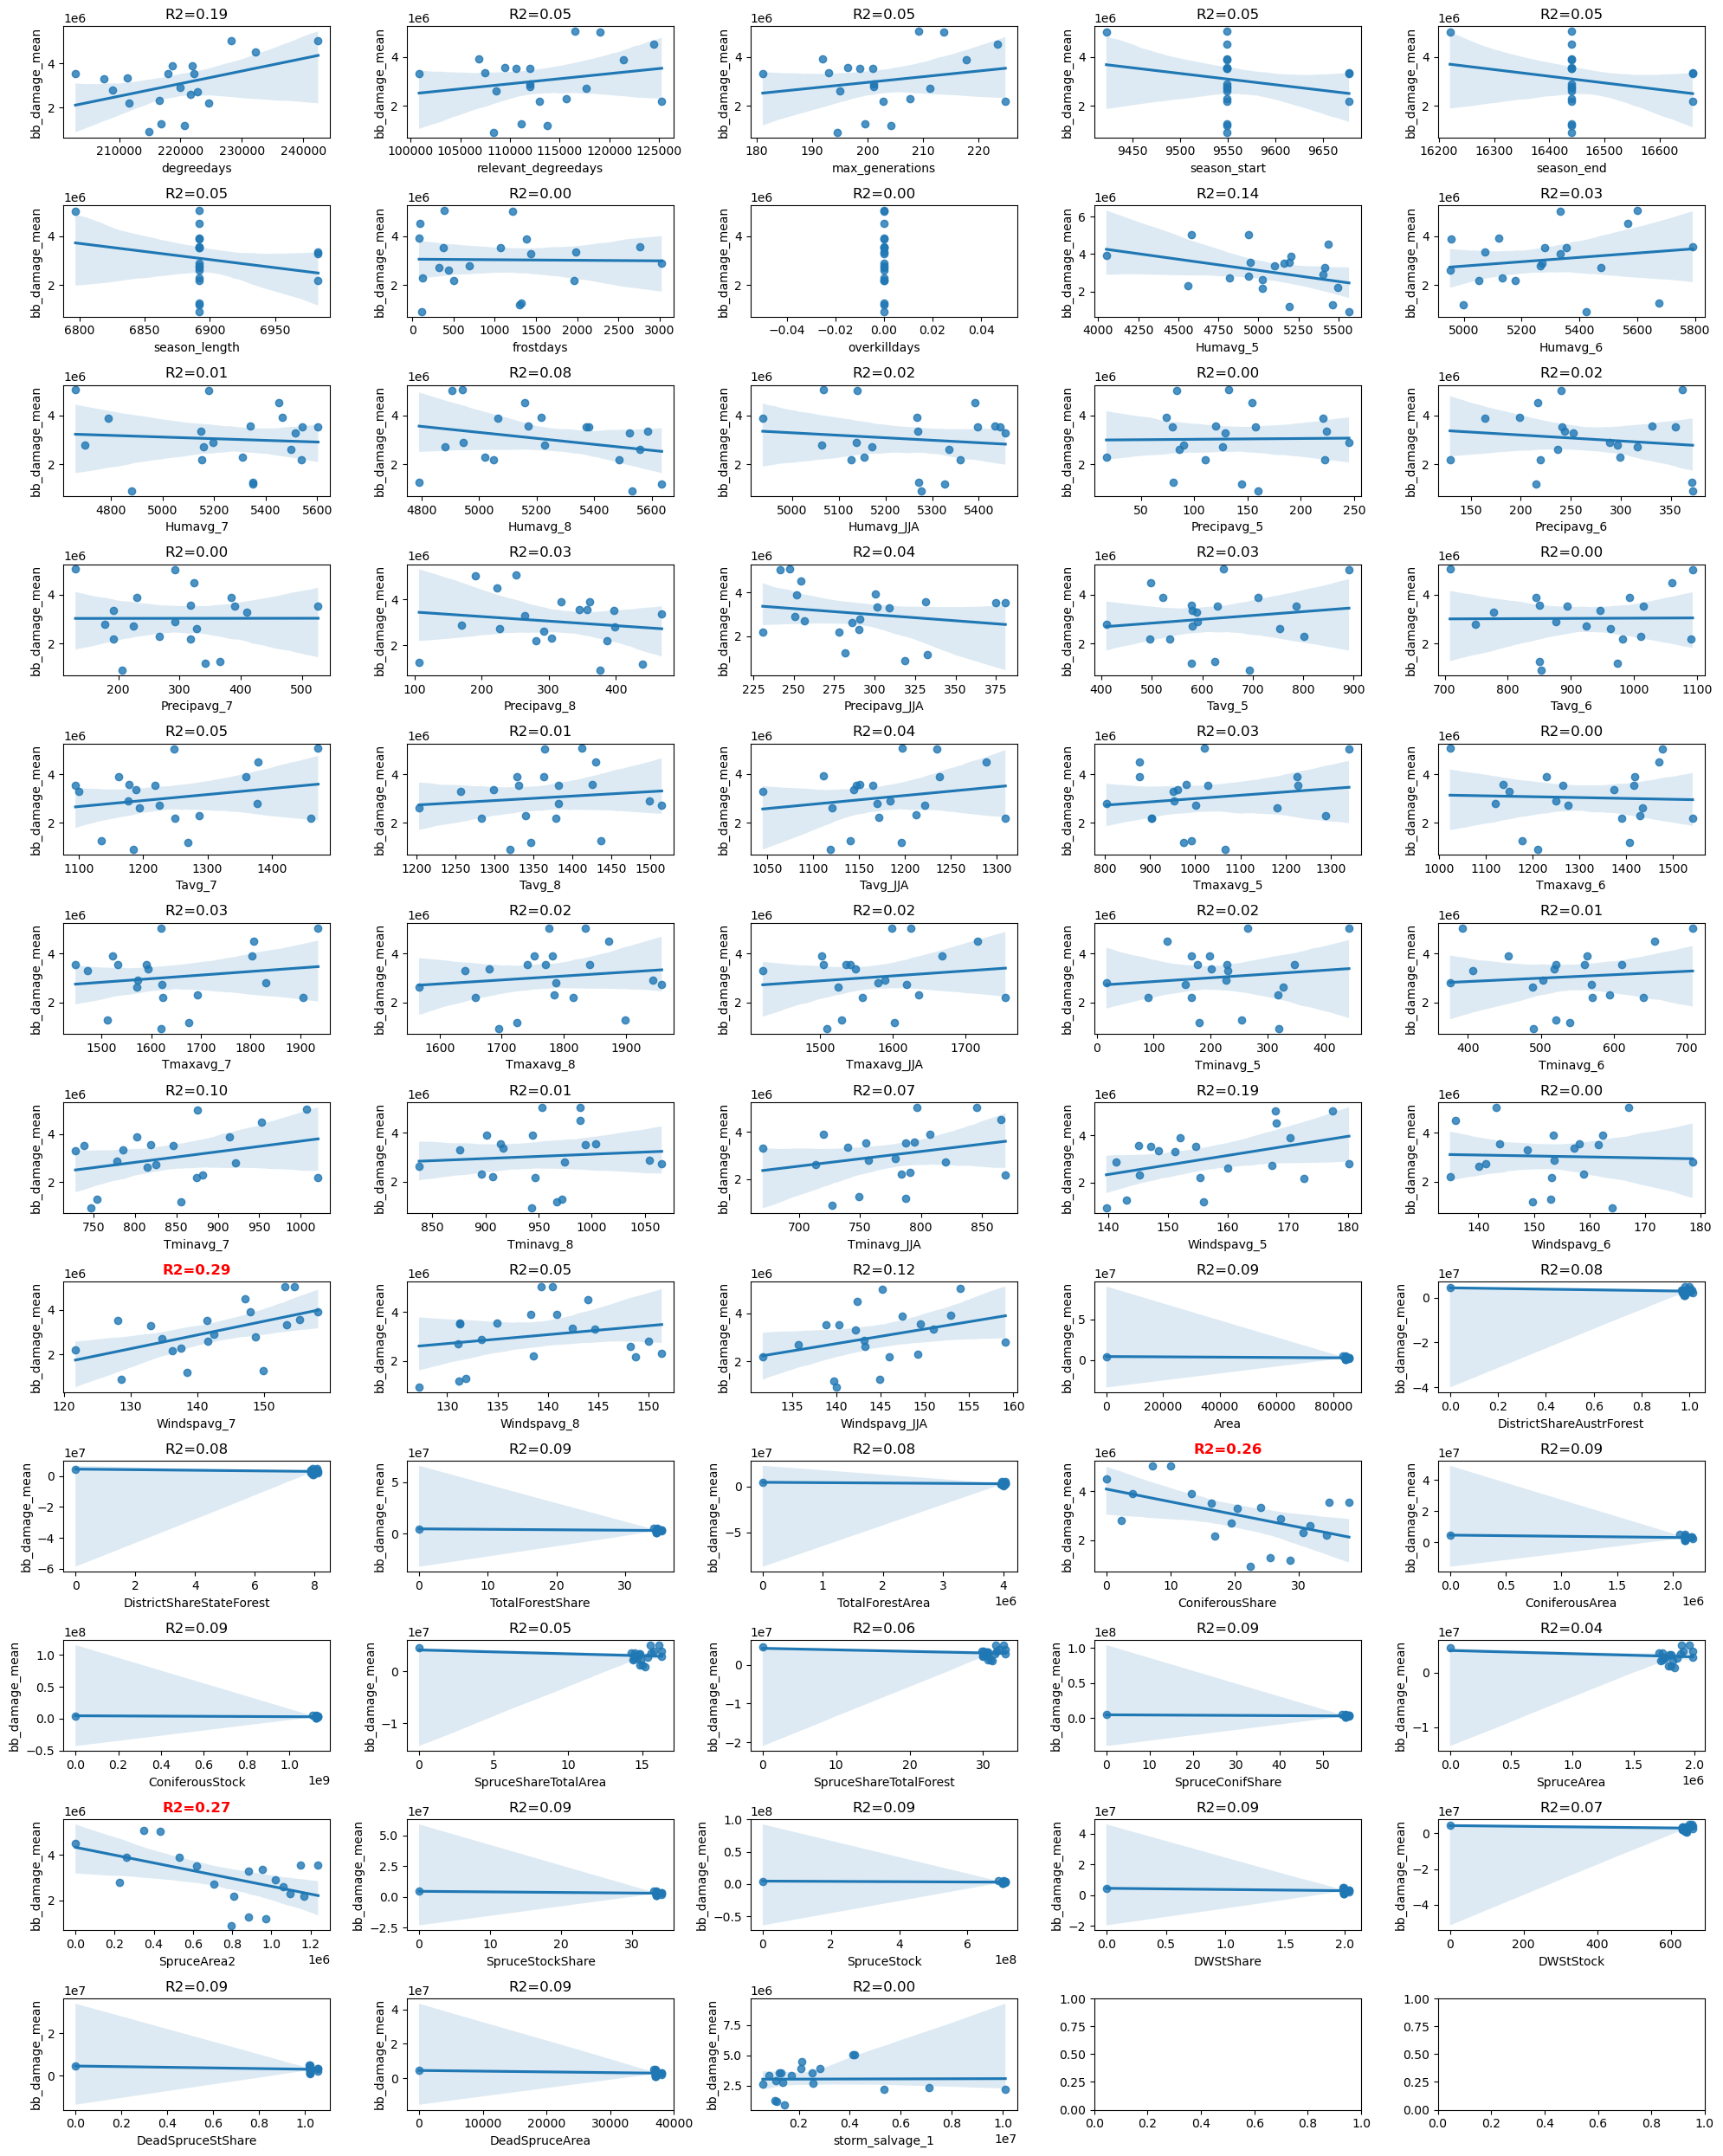

In [ ]:
dat = data_district_level_only[data_district_level_only.columns[4:]].groupby('Year').sum()

fig, axs = plt.subplots(12,5, dpi=100, figsize=(20,25))

count[4]=0

for i, ax in enumerate(fig.axes):
    
    if i<58:   
        var = dat.columns[i]
        
        x = dat[var].astype(np.float64)
        y = dat['bb_damage_mean'].astype(np.float64)
        
        sns.regplot(x = x, 
                    y = y, 
                    ax=ax)
        
        # Pearson R
        try:
            mask = ~np.isnan(x) & ~np.isnan(y)
            
            model = LinearRegression().fit(x.values[mask].reshape((-1, 1)), y.values[mask])
            r_sq  = model.score(x.values[mask].reshape((-1, 1)), y.values[mask])
            
            if r_sq >= 0.2:
                weight='bold'
                color='red'
                count[4]+=1
            else:
                weight='normal'
                color='black'
                
            ax.set_title(f"R2={r_sq :.2f}", weight=weight, color=color)
            
        except: 
            print(f"{var} contains NaN")
        
    else:
        pass 
print(f"Number of Parameters R2>0.2 :  {count[4]}")
fig.tight_layout()
    


In [ ]:
# Show how many R2 were >0.2
count

{1: 19, 2: 57, 3: 6, 4: 3}

## Unaggregated locations
#### 5) district-level only

In [92]:
data_district_level_only

ForestryDistrict FederalState  lat_center  lon_center  Year   degreedays  \
0      EisenstadtRust   Burgenland   47.829150   16.678850  2003  3703.680176   
1      EisenstadtRust   Burgenland   47.829150   16.678850  2004  3509.170654   
2      EisenstadtRust   Burgenland   47.829150   16.678850  2005  3586.299316   
3      EisenstadtRust   Burgenland   47.829150   16.678850  2006  3731.570557   
4      EisenstadtRust   Burgenland   47.829150   16.678850  2007  3703.141113   
...               ...          ...         ...         ...   ...          ...   
1742        Feldkirch   Vorarlberg   47.257412    9.664555  2018  3456.260010   
1743        Feldkirch   Vorarlberg   47.257412    9.664555  2019  3152.130371   
1744        Feldkirch   Vorarlberg   47.257412    9.664555  2020  3144.560303   
1745        Feldkirch   Vorarlberg   47.257412    9.664555  2021  2910.789795   
1746        Feldkirch   Vorarlberg   47.257412    9.664555  2022  3321.978760   

      relevant_degreedays  max_generations  season_start  season_end  ...  \
0             2008.240112         3.605458           127         220  ...   
1             1696.410278         3.045620           127         220  ...   
2             1810.430054         3.250323           127         220  ...   
3             1874.019775         3.364488           127         220  ...   
4             1987.449829         3.568133           127         220  ...   
...                   ...              ...           ...         ...  ...   
1742          1687.459717         3.029551           128         219  ...   
1743          1586.679932         2.848618           128         219  ...   
1744          1495.789673         2.685439           128         219  ...   
1745          1472.299927         2.643267           128         219  ...   
1746          1735.159790         3.115188           128         219  ...   

      SpruceShareTotalForest  SpruceConifShare   SpruceArea  SpruceArea2  \
0                   0.092108          0.272308  1500.000000  1025.641026   
1                   0.091908          0.276923  1500.000000  1172.161172   
2                   0.091708          0.281538  1500.000000  1318.681319   
3                   0.091508          0.286154  1500.000000  1465.201465   
4                   0.091309          0.290769  1500.000000  1611.721612   
...                      ...               ...          ...          ...   
1742                0.438205          0.666667  5553.033638  1005.000000   
1743                0.449857          0.666667  5725.592931   670.000000   
1744                0.461510          0.666667  5898.152225   335.000000   
1745                0.461510          0.666667  5898.152225     0.000000   
1746                0.461510          0.666667  5898.152225     0.000000   

      SpruceStockShare  SpruceStock  DWStShare  DWStStock  storm_salvage_1  \
0             0.213627     400000.0      0.028   6.800000       574.902042   
1             0.213627     400000.0      0.028   6.800000      1224.941506   
2             0.213627     400000.0      0.028   6.800000       964.695414   
3             0.213627     400000.0      0.028   6.800000      1984.376452   
4             0.213627     400000.0      0.028   6.800000       370.217339   
...                ...          ...        ...        ...              ...   
1742          0.725265    1876000.0      0.018   7.800000     62340.000000   
1743          0.725265    1876000.0      0.018   7.433333     12546.000000   
1744          0.725265    1876000.0      0.018   7.066667     22042.000000   
1745          0.725265    1876000.0      0.018   7.066667      3849.000000   
1746          0.725265    1876000.0      0.018   7.066667      2490.000000   

      bb_damage_mean  
0        2593.018363  
1        3586.559638  
2        3689.506544  
3        2438.943464  
4        2330.123749  
...              ...  
1742         13189.2  
1743         30910.8  
1744         22798.8  
1745         13773.6  
1746

Number of Parameters R2>0.2 :  1


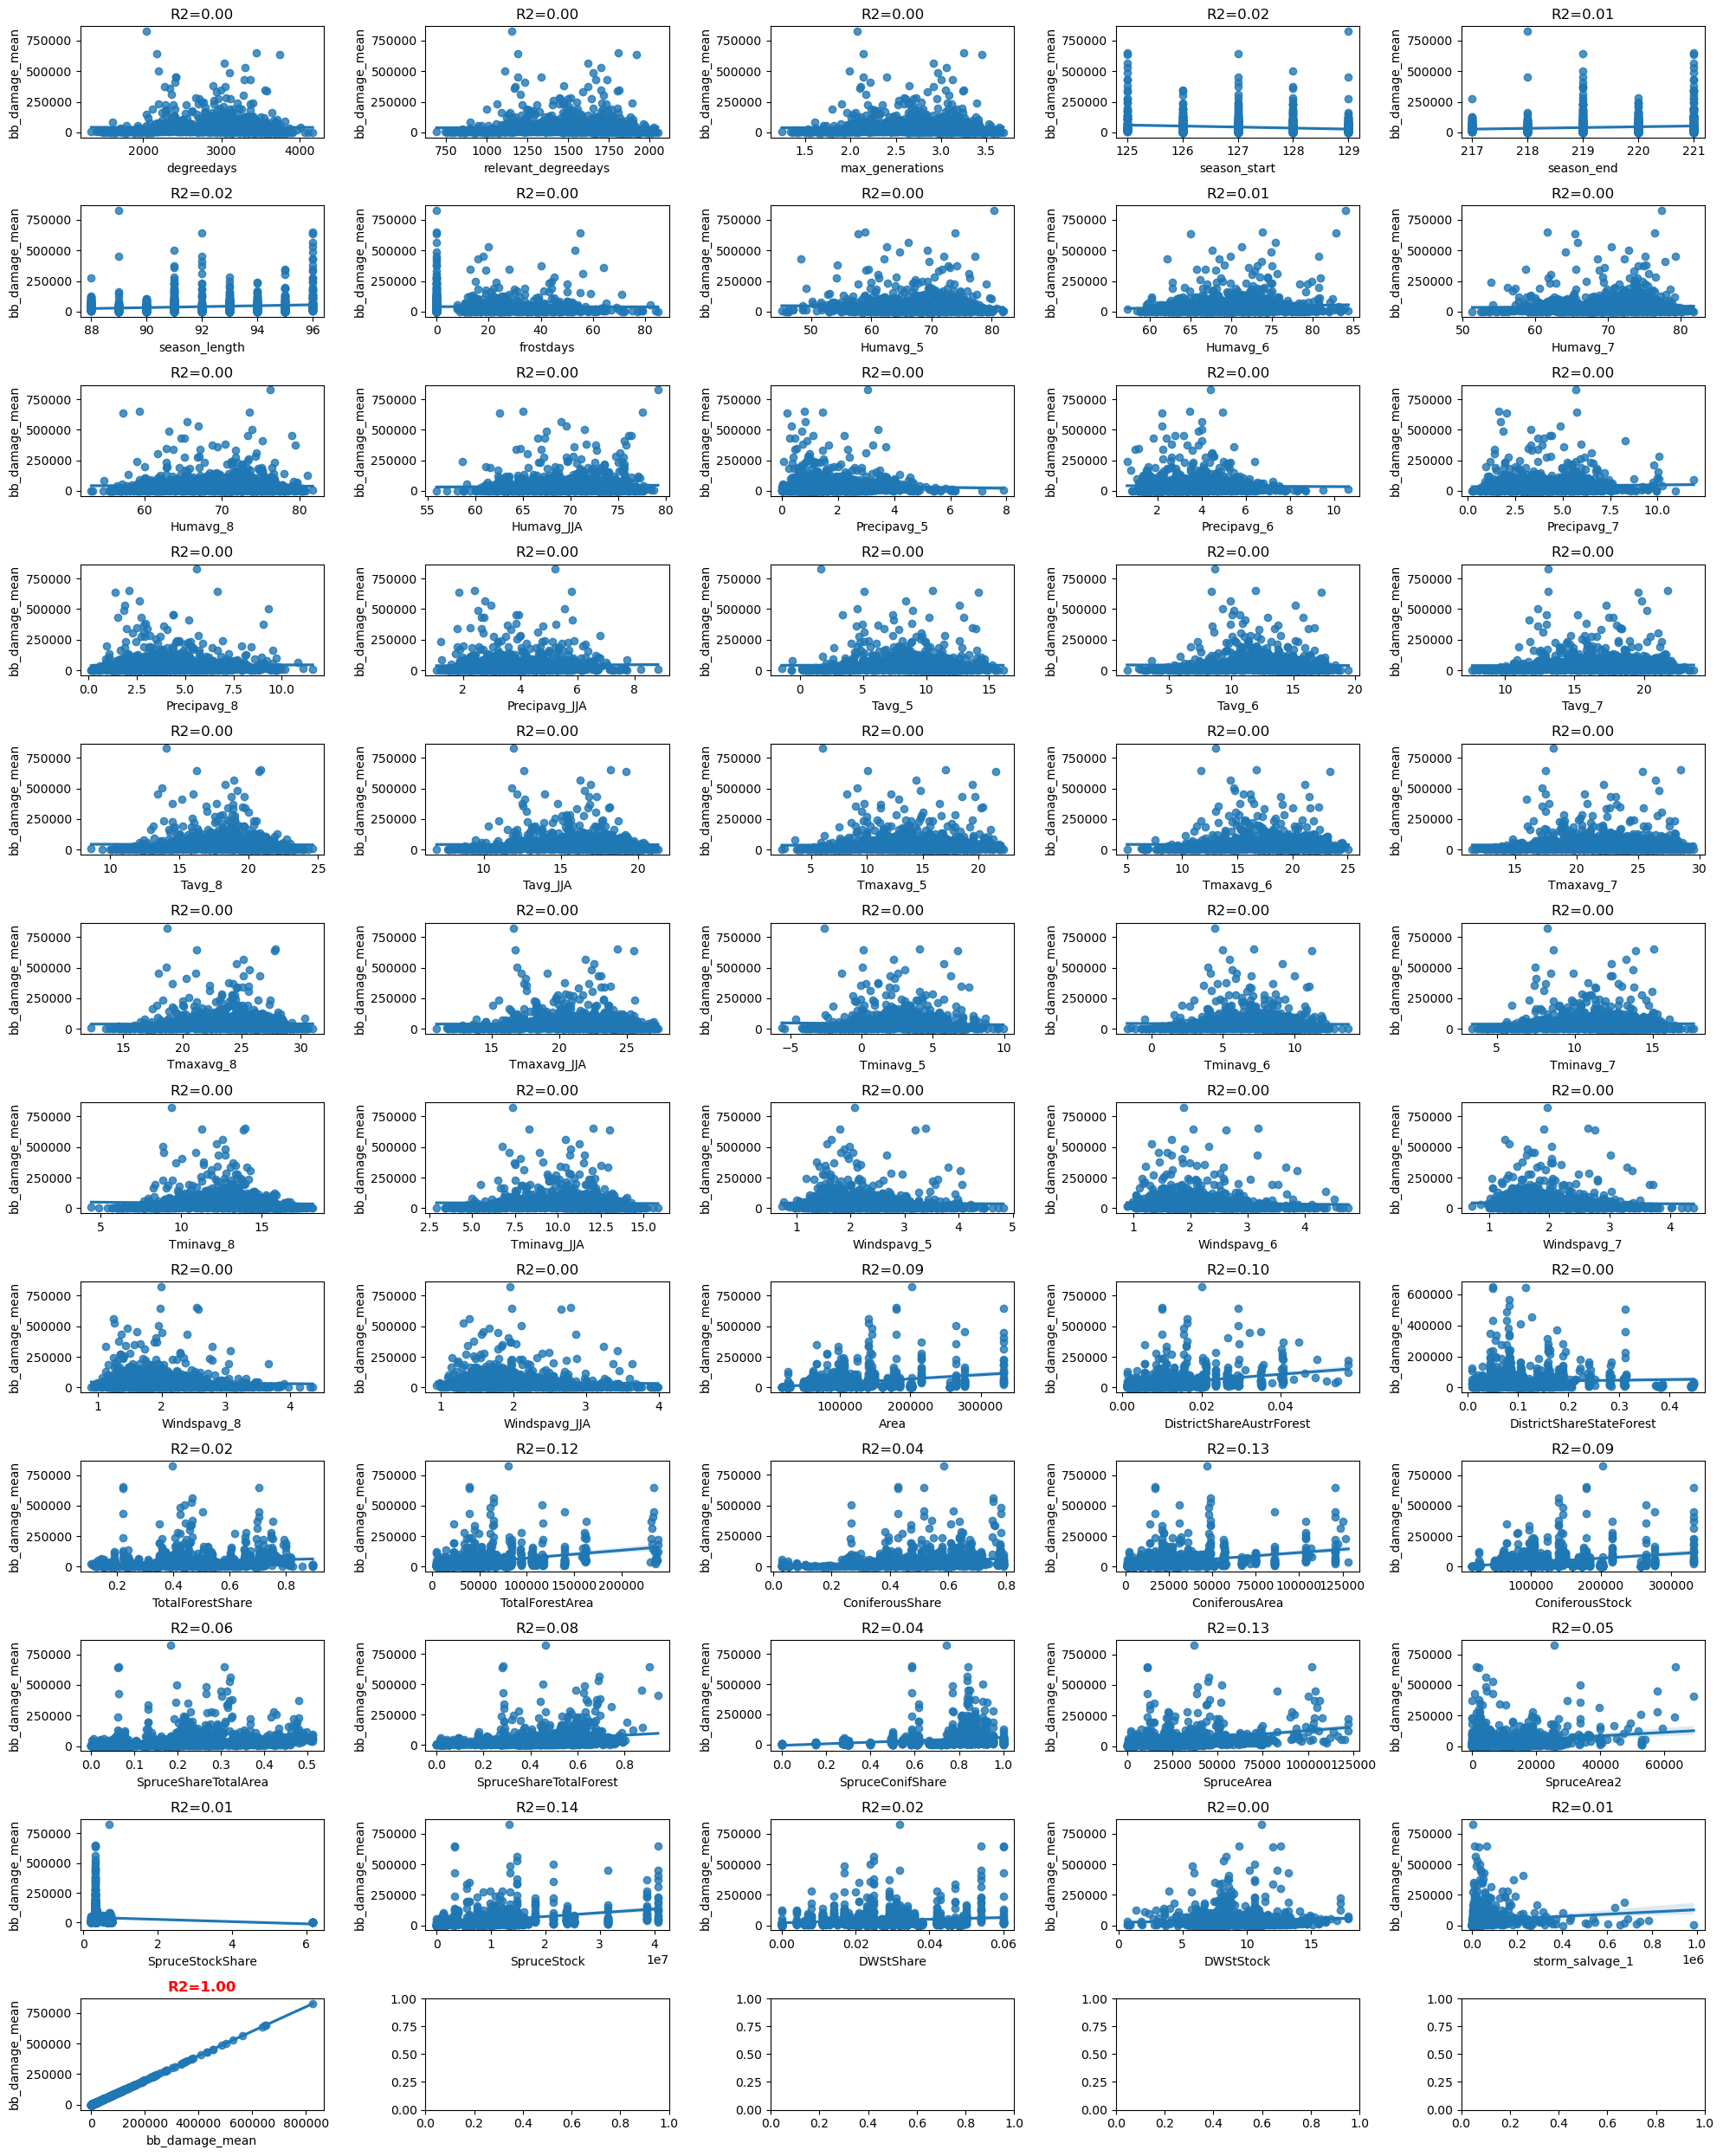

In [93]:
dat = data_district_level_only[data_district_level_only.columns[5:]]

fig, axs = plt.subplots(12,5, dpi=100, figsize=(20,25))

count[5]=0

for i, ax in enumerate(fig.axes):
    
    if i<56:   
        var = dat.columns[i]
        
        x = dat[var].astype(np.float64)
        y = dat['bb_damage_mean'].astype(np.float64)
        
        sns.regplot(x = x, 
                    y = y, 
                    ax=ax)
        
        # Pearson R
        try:
            mask = ~np.isnan(x) & ~np.isnan(y)
            
            model = LinearRegression().fit(x.values[mask].reshape((-1, 1)), y.values[mask])
            r_sq  = model.score(x.values[mask].reshape((-1, 1)), y.values[mask])
            
            if r_sq >= 0.2:
                weight='bold'
                color='red'
                count[5]+=1
            else:
                weight='normal'
                color='black'
                
            ax.set_title(f"R2={r_sq :.2f}", weight=weight, color=color)
            
        except: 
            print(f"{var} contains NaN")
        
    else:
        pass 
print(f"Number of Parameters R2>0.2 :  {count[5]}")
fig.tight_layout()
    

#### 6) Including state-level

Number of Parameters R2>0.2 :  10


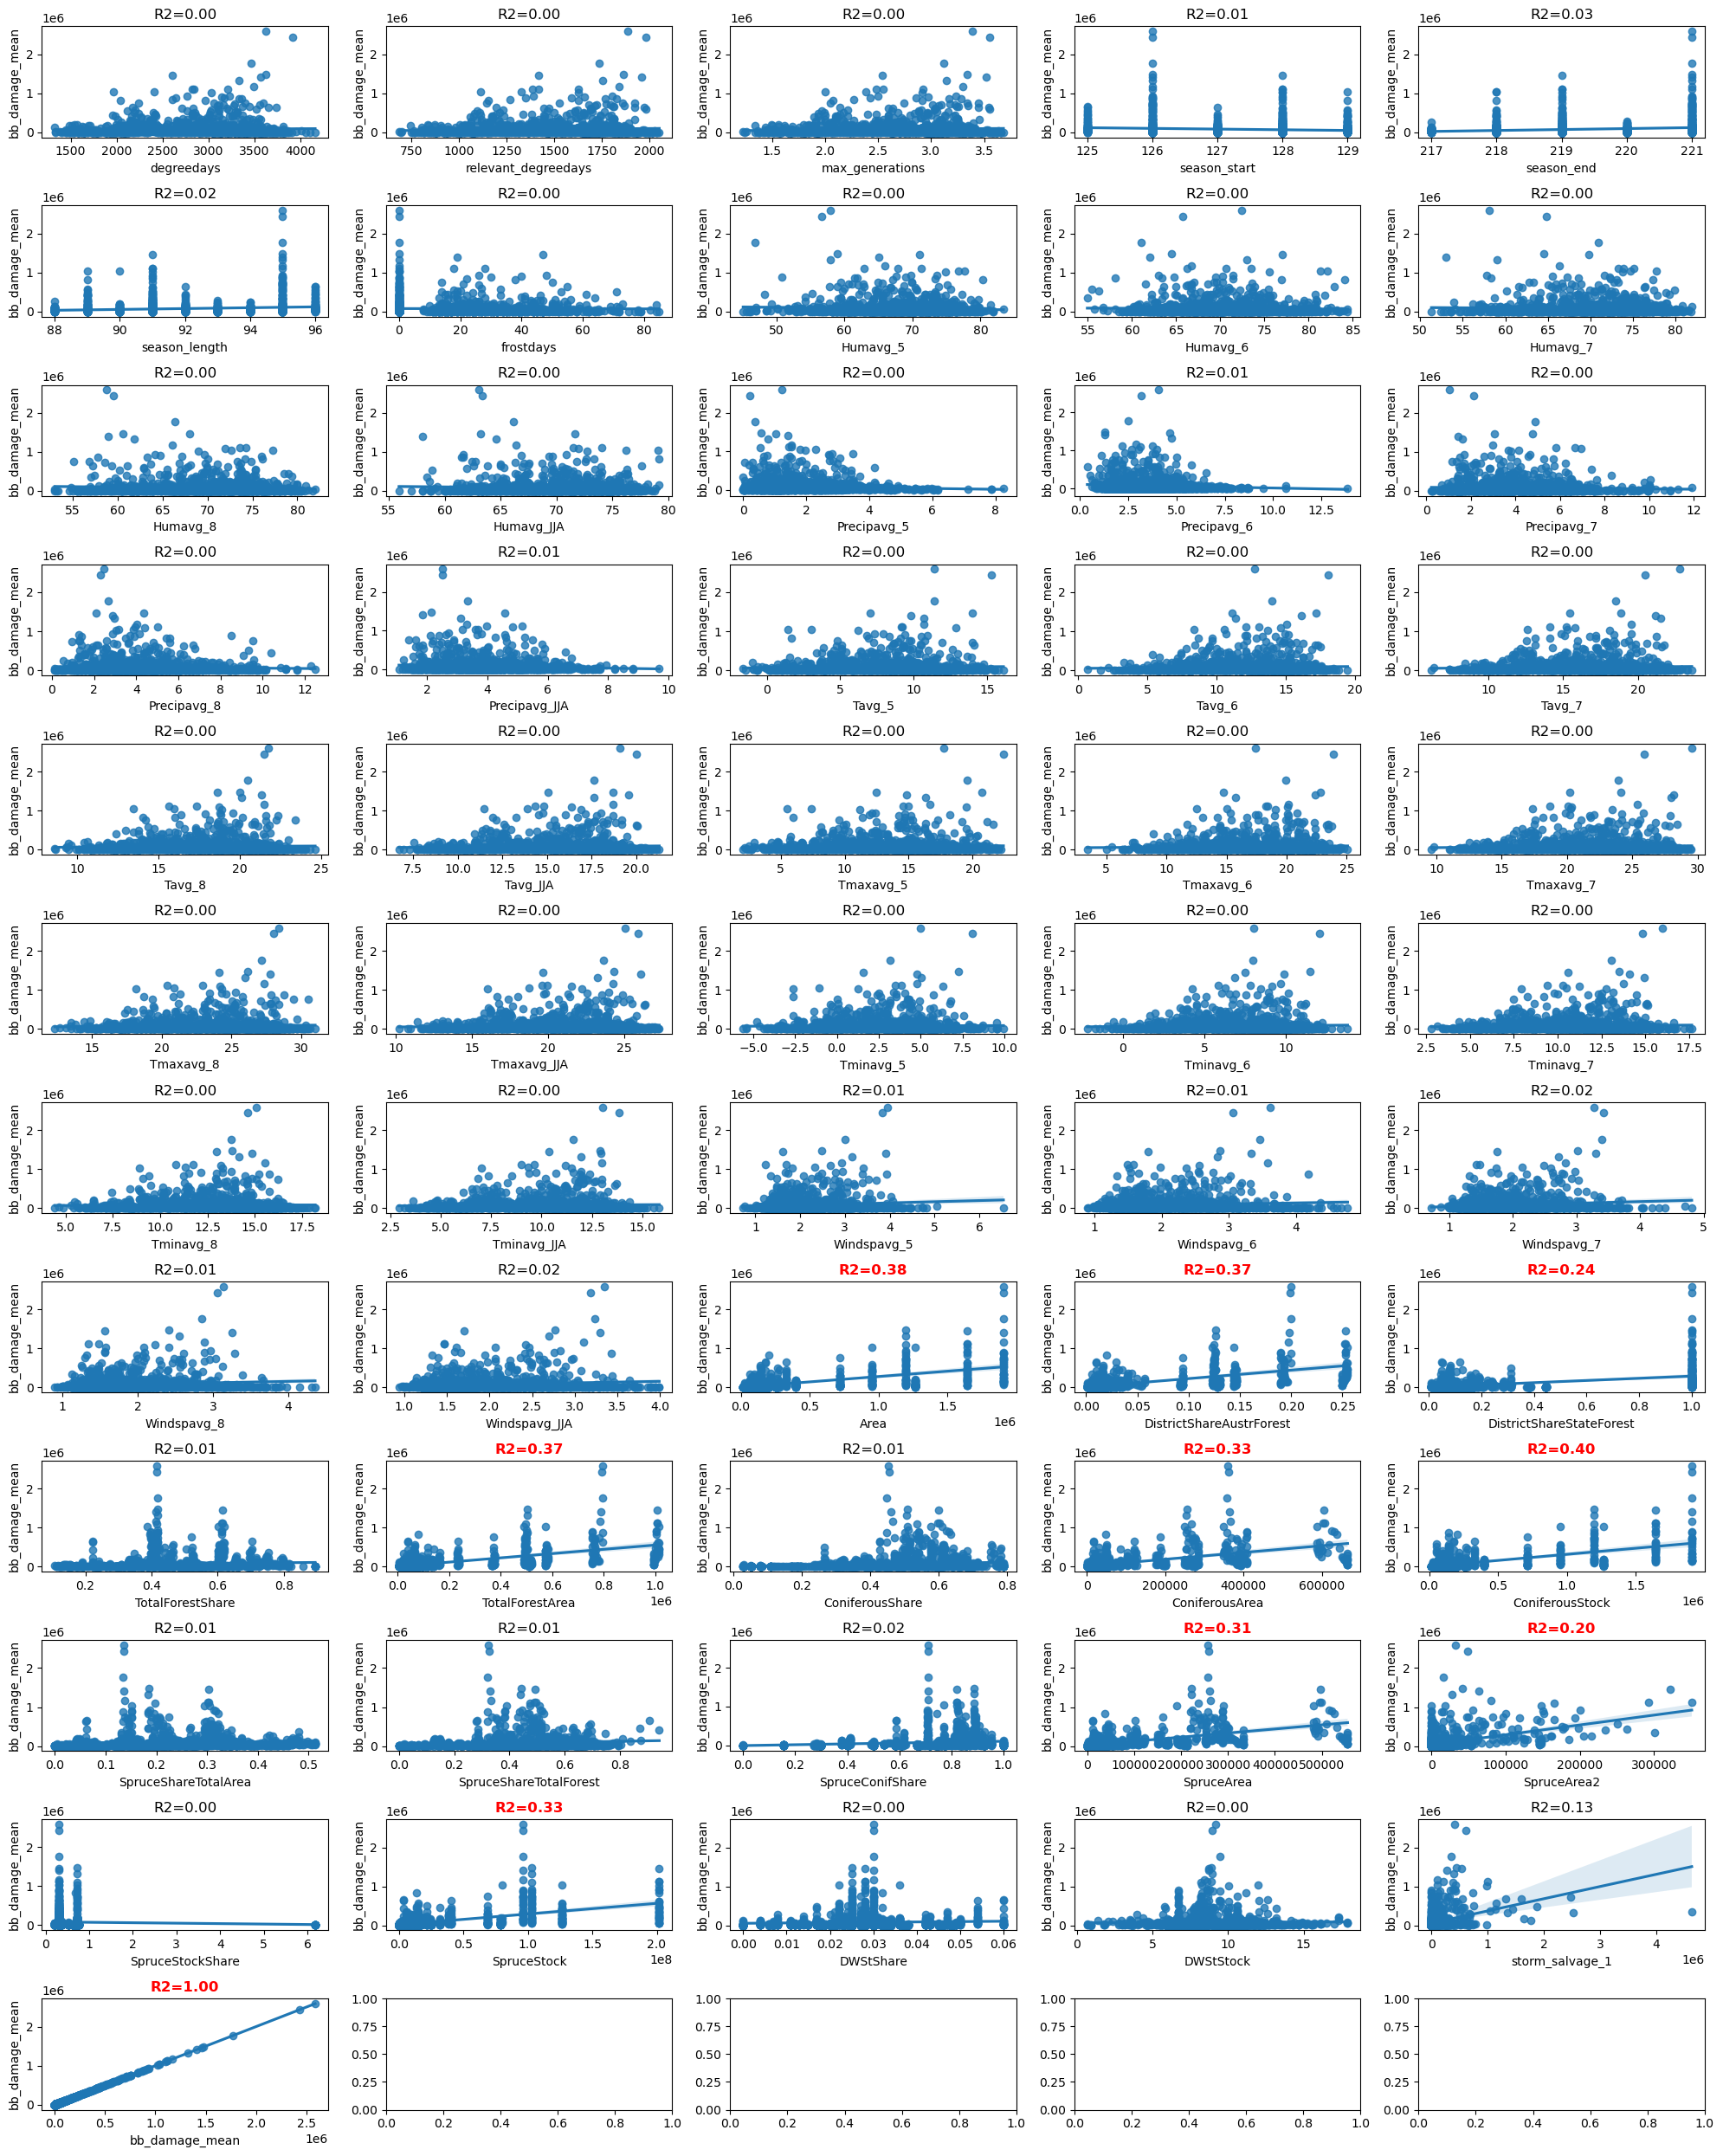

In [94]:
dat = Merge[Merge.columns[5:]]

fig, axs = plt.subplots(12,5, dpi=100, figsize=(20,25))

count[6]=0

for i, ax in enumerate(fig.axes):
    
    if i<56:   
        var = dat.columns[i]
        
        x = dat[var].astype(np.float64)
        y = dat['bb_damage_mean'].astype(np.float64)
        
        sns.regplot(x = x, 
                    y = y, 
                    ax=ax)
        
        # Pearson R
        try:
            mask = ~np.isnan(x) & ~np.isnan(y)
            
            model = LinearRegression().fit(x.values[mask].reshape((-1, 1)), y.values[mask])
            r_sq  = model.score(x.values[mask].reshape((-1, 1)), y.values[mask])
            
            if r_sq >= 0.2:
                weight='bold'
                color='red'
                count[6]+=1
            else:
                weight='normal'
                color='black'
                
            ax.set_title(f"R2={r_sq :.2f}", weight=weight, color=color)
            
        except: 
            print(f"{var} contains NaN")
        
    else:
        pass 
print(f"Number of Parameters R2>0.2 :  {count[6]}")
fig.tight_layout()
    


In [95]:
count

{1: 15, 2: 56, 3: 13, 5: 1, 6: 10}

Conclusion: Aggregation is worth it. With too many datapoints, in single regression analysis, the results are trivial.

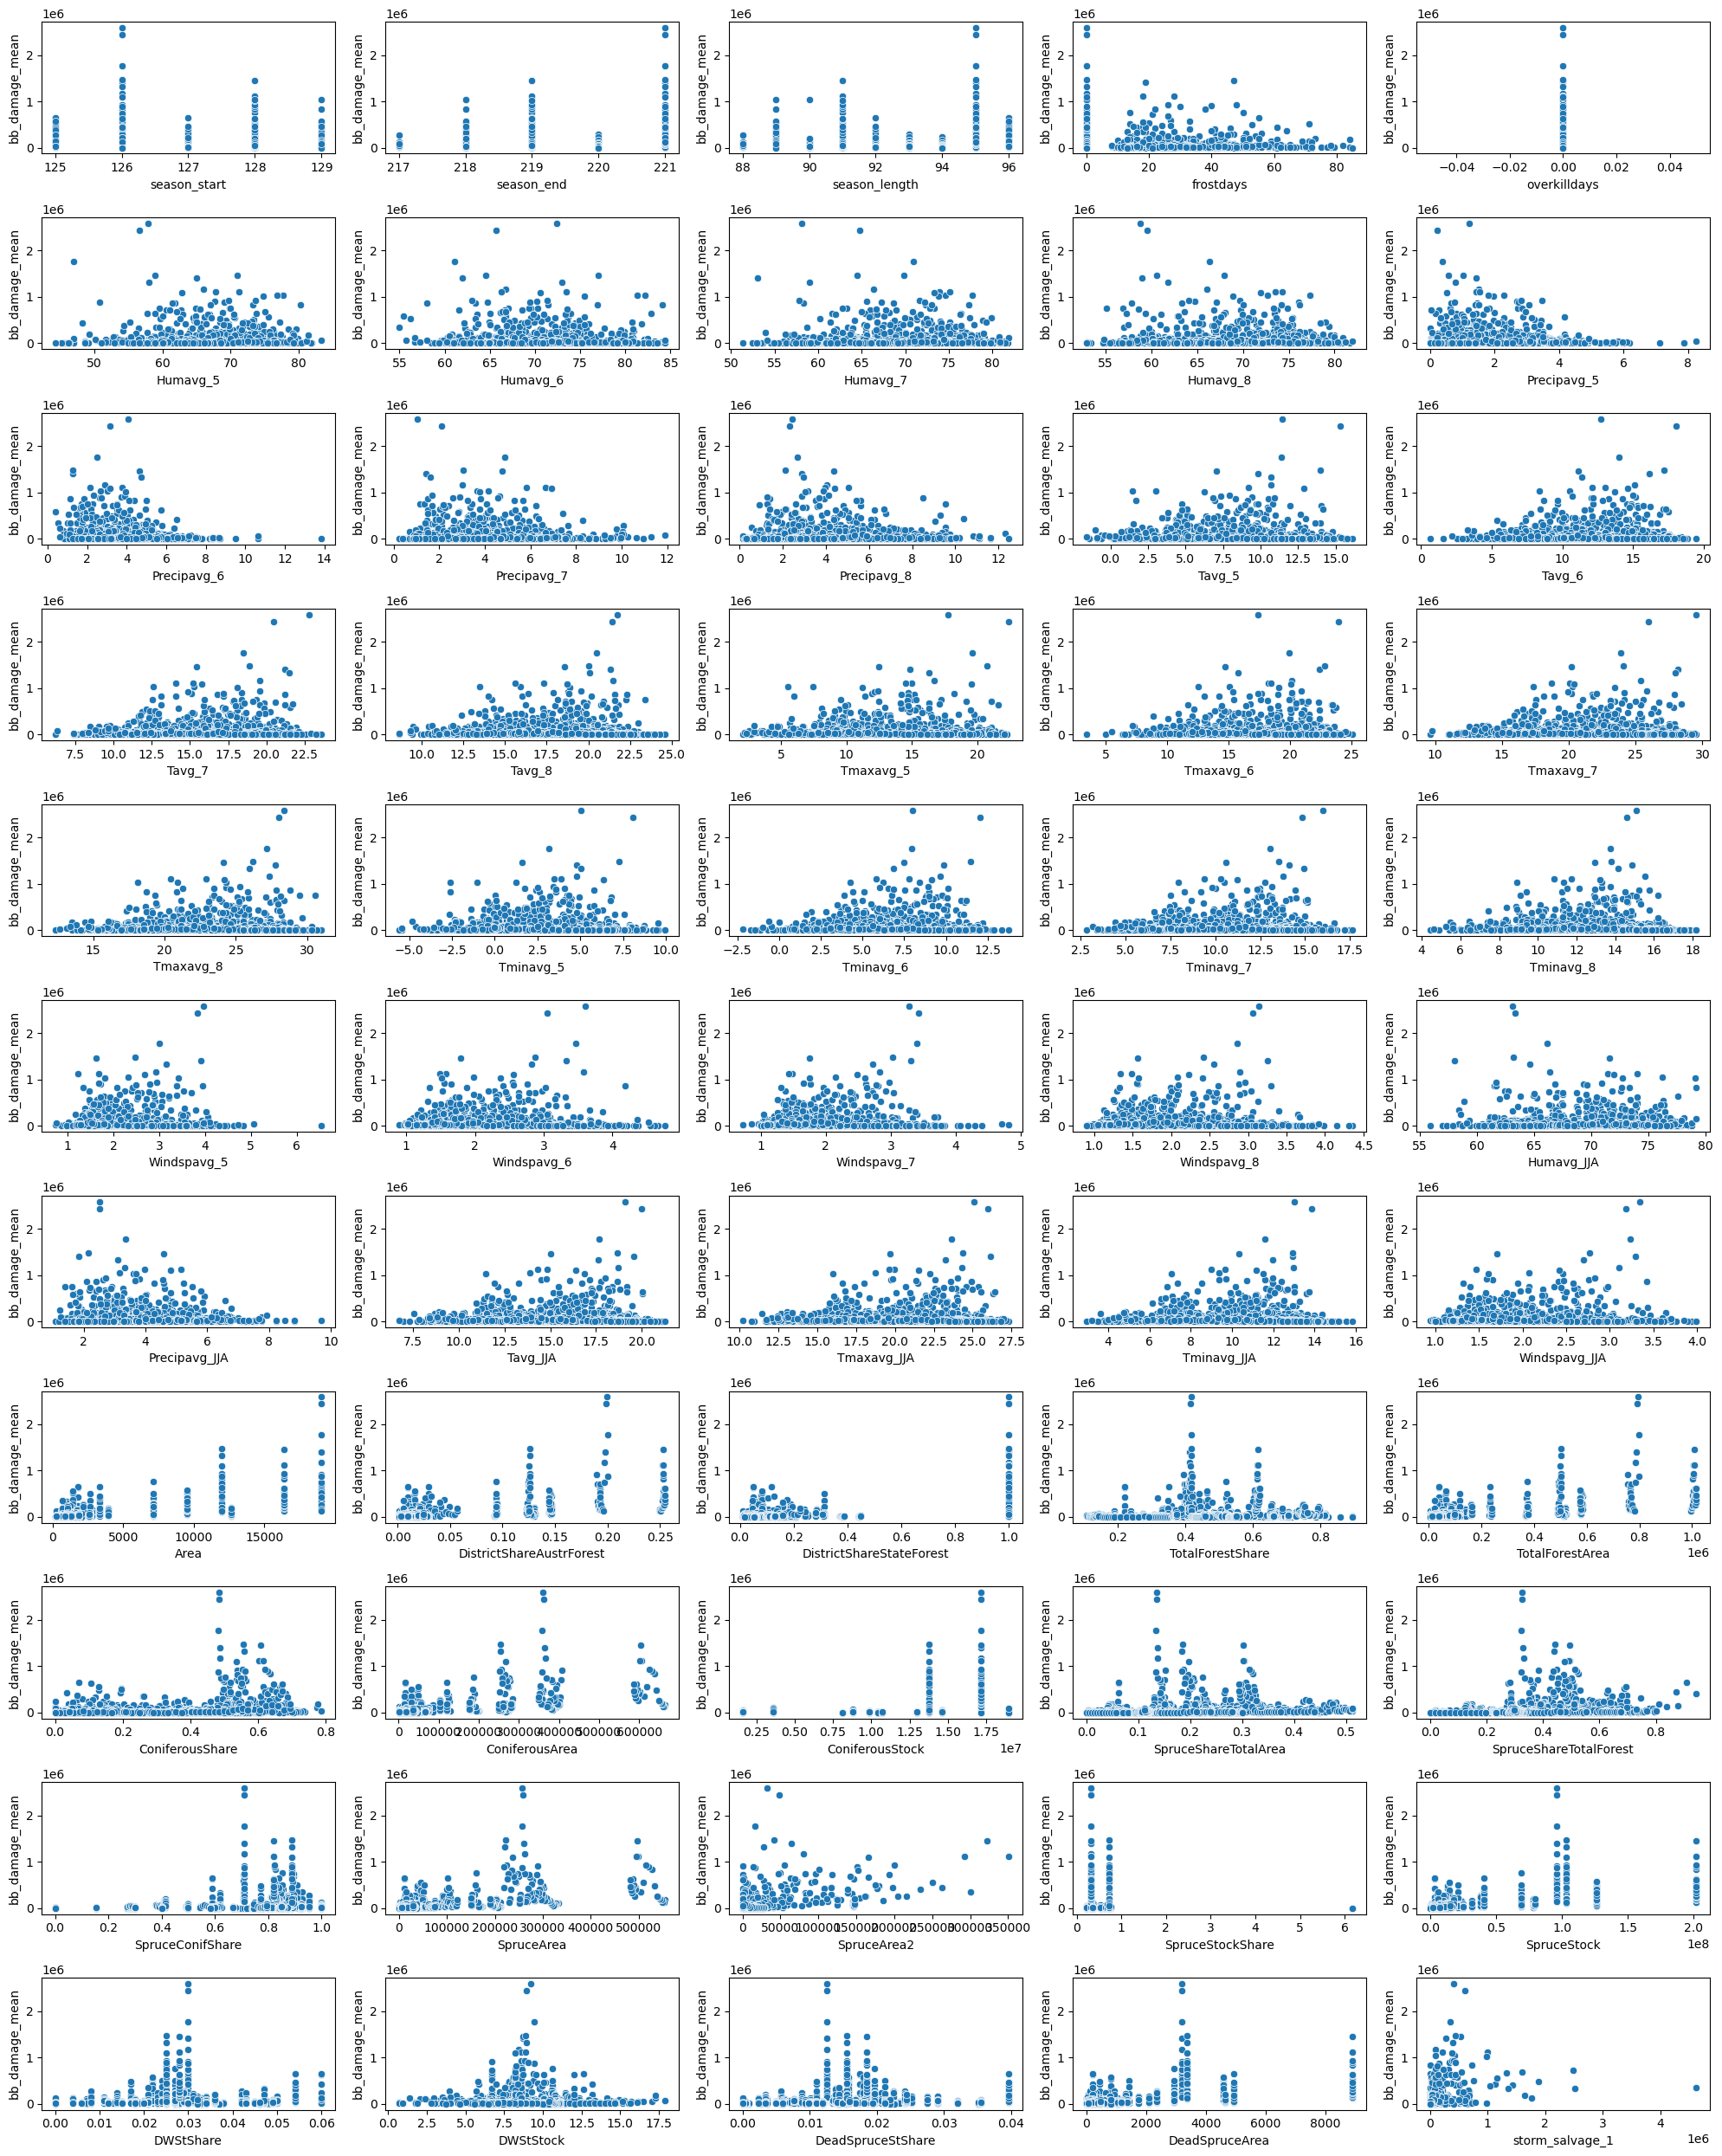

In [ ]:
fig, axs = plt.subplots(11,5, dpi=100, figsize=(20,25))

for i, ax in enumerate(fig.axes):
    
    if i<56:
    
        var = X.columns[3:][i]
        
        sns.scatterplot(x = X[var], y = Y3, ax=ax)
        
        #ax.set_title(var)
    else:
        pass
    
fig.tight_layout()
    
    

## Multiple Regression Analysis

In [164]:
Y = Merge['bb_damage_mean']
X = Merge[Merge.columns[5:-1]]

In [165]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=101) 


In [166]:
# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [167]:
model.coef_

array([ 8.46326647e+01,  2.27111669e+07, -1.26499730e+10, -2.80595254e+07,
        2.80595971e+07, -2.80556004e+07,  6.81621072e+02, -2.07223333e+03,
       -1.24336940e+08, -1.24339478e+08, -1.24340347e+08,  3.73016742e+08,
        1.23583190e+04,  2.57397792e+07,  2.57448233e+07,  2.57479023e+07,
       -7.72258189e+07, -4.12555114e+04, -5.33779821e+04,  5.99660627e+04,
        7.13569924e+04,  2.67381677e+04,  2.78490211e+04,  2.14186865e+04,
       -3.76945678e+04, -3.06339901e+04, -1.57524227e+04,  1.31656806e+04,
        1.89992630e+04, -1.63979890e+04, -5.58522085e+04, -2.00590910e+04,
       -1.22155837e+04,  9.49793644e+03, -1.33205135e+04,  9.98160806e+03,
        2.15390857e+03, -3.13351560e+06, -2.60257024e+06, -9.32478245e+04,
       -5.53894373e+04,  3.41588020e+00,  1.44640589e+05, -3.76962829e+00,
        3.13351548e+06,  1.46754153e+05,  6.43781227e+04, -9.14897440e+04,
       -2.82122195e+00,  2.24154472e-01,  8.08136997e+03,  9.10253823e-03,
       -2.09661441e+05,  

In [168]:
model.feature_names_in_

array(['degreedays', 'relevant_degreedays', 'max_generations',
       'season_start', 'season_end', 'season_length', 'frostdays',
       'Humavg_5', 'Humavg_6', 'Humavg_7', 'Humavg_8', 'Humavg_JJA',
       'Precipavg_5', 'Precipavg_6', 'Precipavg_7', 'Precipavg_8',
       'Precipavg_JJA', 'Tavg_5', 'Tavg_6', 'Tavg_7', 'Tavg_8',
       'Tavg_JJA', 'Tmaxavg_5', 'Tmaxavg_6', 'Tmaxavg_7', 'Tmaxavg_8',
       'Tmaxavg_JJA', 'Tminavg_5', 'Tminavg_6', 'Tminavg_7', 'Tminavg_8',
       'Tminavg_JJA', 'Windspavg_5', 'Windspavg_6', 'Windspavg_7',
       'Windspavg_8', 'Windspavg_JJA', 'Area', 'DistrictShareAustrForest',
       'DistrictShareStateForest', 'TotalForestShare', 'TotalForestArea',
       'ConiferousShare', 'ConiferousArea', 'ConiferousStock',
       'SpruceShareTotalArea', 'SpruceShareTotalForest',
       'SpruceConifShare', 'SpruceArea', 'SpruceArea2',
       'SpruceStockShare', 'SpruceStock', 'DWStShare', 'DWStStock',
       'storm_salvage_1'], dtype=object)

In [171]:
model.score(X,Y)

0.5374843028940004